**Архів містить 4 файли:**
tabular_data.csv, hashed_feature.csv, train.csv, test.csv.

**Для чого вони?**<br>
Ці файли допоможуть вирішити аналітичну задачу. Необхідно побудувати модель, що виявлятиме сегмент водіїв серед абонентів ПрАТ «Київстар».

**Це задача бінарної класифікації:**<br>
«1» – абонент являється водієм (відноситься до сегменту водіїв),<br>
«0» – абонент не є водієм (не відноситься до сегменту водіїв).

Файли tabular_data.csv і hashed_feature.csv ̶  тут описові характеристики щодо 4084 абонентів («ID» – це ідентифікатор абонента).<br>
Файл train.csv  ̶  це дані щодо цільової мітки (чи належить абонент до сегменту водіїв).<br>
Файл test.csv  ̶  це список абонентів, для яких необхідно зробити прогноз, за яким ми й будемо оцінювати якість ваших моделей.<br>

**А тепер детальніше:**<br><br>
» Файл **tabular_data.csv** містить числові дані щодо активності абонента за 12 періодів. 

• period – номер періоду (періоди послідовні, 1 – найновіший);<br>
• id – ідентифікатор абонента;<br>
• feature_0 – feature_49 – дані щодо активності абонента у відповідний період.<br>

» Файл **hashed_feature.csv** – тут набір захешованих значень однієї категоріальної змінної для абонента.

• id – ідентифікатор абонента;<br>
• feature_50 – хеш від значення категоріальної змінної.<br>

» Файл **train.csv** – тут дані з цільовою міткою.

• id – ідентифікатор абонента;<br>
• target – значення цільової мітки (1 – належить до сегменту водіїв, 0 – не належить до сегменту водіїв).<br>

» Файл **test.csv** – список абонентів, для яких потрібно зробити передбачення за допомогою ваших моделей.

• id – ідентифікатор абонента;<br>
• score – ймовірність того, що абонент належить до сегменту водіїв (класу «1»). Цю ймовірність визначає ваша модель<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tabular_df = pd.read_csv('data/tabular_data.csv')

In [3]:
tabular_df.tail(20)

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
61252,5104,5,110.0,80.00,0.073257,1463.975346,111.53,0.0,0.519529,75.37,...,0.56,0,1.239012,0.0,80.00,0.0,0.869407,47.0,87.57,1.0
61253,5104,6,110.0,76.00,0.071974,1525.286145,83.60,0.0,0.516914,53.53,...,0.95,0,0.766515,0.0,75.00,3.0,0.885965,57.0,44.57,11.0
61254,5104,7,110.0,81.00,0.079858,585.474171,72.78,0.0,0.416587,80.85,...,0.00,0,0.365062,2.0,77.00,1.0,0.885108,70.0,45.03,9.0
61255,5104,8,110.0,190.00,0.092790,1568.895753,70.22,0.0,0.533356,81.47,...,0.24,0,1.021564,0.0,190.00,3.0,0.828269,64.0,46.95,3.0
61256,5104,9,110.0,75.77,0.047618,750.569168,53.78,0.0,0.529132,109.05,...,2.81,0,2.323037,0.0,75.77,2.0,0.843357,64.0,35.18,0.0
61257,5104,10,110.0,77.00,0.042542,226.958903,59.15,0.0,0.545019,94.45,...,0.00,0,0.428345,1.0,75.00,5.0,0.899840,66.0,43.42,0.0
61258,5104,11,110.0,75.00,0.072478,96.686803,66.42,0.0,0.593276,85.50,...,0.62,0,0.542913,0.0,75.00,4.0,0.883273,95.0,48.92,0.0
61259,5104,12,110.0,77.00,0.101403,185.418803,92.82,0.0,0.487033,106.93,...,-0.01,0,0.256103,1.0,75.00,12.0,NaN,94.0,74.47,2.0
61260,5105,1,110.0,75.00,NaN,0.000000,29.07,0.0,0.090815,234.70,...,0.00,0,0.000000,0.0,75.00,0.0,0.037322,38.0,14.23,0.0
61261,5105,2,110.0,77.00,NaN,0.000000,55.88,0.0,0.081054,242.97,...,0.00,0,0.000000,0.0,75.00,1.0,0.037963,34.0,52.70,0.0


In [4]:
tabular_df.dtypes.value_counts()

float64    48
int64       3
object      1
dtype: int64

In [5]:
tabular_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,61272.0,2552.500000,1473.987237,0.000000,1276.000000,2552.500000,3829.000000,5105.000000
period,61272.0,6.500000,3.452081,1.000000,3.750000,6.500000,9.250000,12.000000
feature_0,58460.0,110.070493,0.465371,110.000000,110.000000,110.000000,110.000000,119.000000
feature_1,58380.0,87.142409,95.507541,-4.250000,45.000000,75.000000,114.000000,7989.000000
feature_2,57795.0,0.305150,0.746314,0.000000,0.059522,0.147504,0.321111,5.474424
feature_3,58314.0,3003.454276,11218.392268,0.000000,0.000000,10.898701,1809.999746,557998.502178
feature_4,58425.0,414.703826,524.216185,0.000000,70.320000,254.950000,566.530000,10335.280000
feature_5,58257.0,1466.527398,7356.174585,0.000000,0.000000,0.000000,0.000000,334448.528357
feature_6,57814.0,0.576053,0.738444,0.000002,0.247418,0.492813,0.698059,5.499928
feature_7,58280.0,391.127914,436.314898,0.000000,99.295000,262.430000,535.162500,7950.650000


In [6]:
tabular_df.isna().sum()

id               0
period           0
feature_0     2812
feature_1     2892
feature_2     3477
feature_3     2958
feature_4     2847
feature_5     3015
feature_6     3458
feature_7     2992
feature_8     2934
feature_9     2928
feature_10    2954
feature_11    3088
feature_12    3425
feature_13    3334
feature_14    2906
feature_15    2862
feature_16    3079
feature_17       0
feature_18    3060
feature_19    3564
feature_20    2941
feature_21    2809
feature_22    2873
feature_23    3099
feature_24    2951
feature_25       0
feature_26    2668
feature_27    2899
feature_28    2998
feature_29    2462
feature_30    2815
feature_31    2918
feature_32    3002
feature_33    3778
feature_34    2885
feature_35    3017
feature_36    2827
feature_37    2863
feature_38       0
feature_39    2857
feature_40    2870
feature_41       0
feature_42    2883
feature_43    3054
feature_44    2844
feature_45    2965
feature_46    8236
feature_47    2854
feature_48    2904
feature_49    2875
dtype: int64

In [7]:
for i in tabular_df.columns:
    # count number of rows with missing values
    n_miss = tabular_df[i].isnull().sum()
    perc = n_miss / tabular_df.shape[0] * 100
    print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> id, Missing: 0 (0.0%)
> period, Missing: 0 (0.0%)
> feature_0, Missing: 2812 (4.6%)
> feature_1, Missing: 2892 (4.7%)
> feature_2, Missing: 3477 (5.7%)
> feature_3, Missing: 2958 (4.8%)
> feature_4, Missing: 2847 (4.6%)
> feature_5, Missing: 3015 (4.9%)
> feature_6, Missing: 3458 (5.6%)
> feature_7, Missing: 2992 (4.9%)
> feature_8, Missing: 2934 (4.8%)
> feature_9, Missing: 2928 (4.8%)
> feature_10, Missing: 2954 (4.8%)
> feature_11, Missing: 3088 (5.0%)
> feature_12, Missing: 3425 (5.6%)
> feature_13, Missing: 3334 (5.4%)
> feature_14, Missing: 2906 (4.7%)
> feature_15, Missing: 2862 (4.7%)
> feature_16, Missing: 3079 (5.0%)
> feature_17, Missing: 0 (0.0%)
> feature_18, Missing: 3060 (5.0%)
> feature_19, Missing: 3564 (5.8%)
> feature_20, Missing: 2941 (4.8%)
> feature_21, Missing: 2809 (4.6%)
> feature_22, Missing: 2873 (4.7%)
> feature_23, Missing: 3099 (5.1%)
> feature_24, Missing: 2951 (4.8%)
> feature_25, Missing: 0 (0.0%)
> feature_26, Missing: 2668 (4.4%)
> feature_27, Missi

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


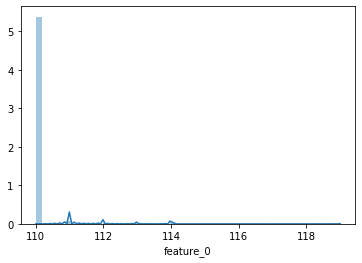

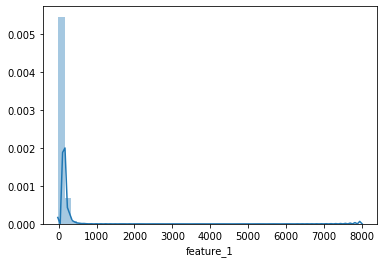

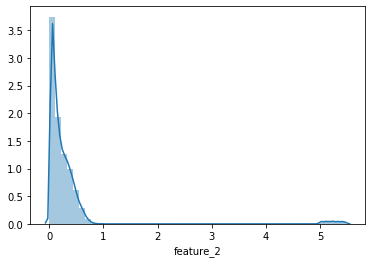

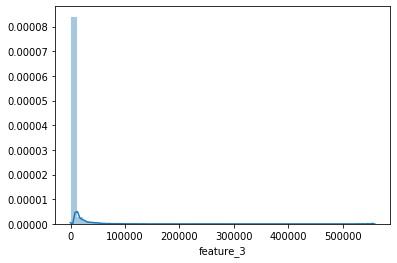

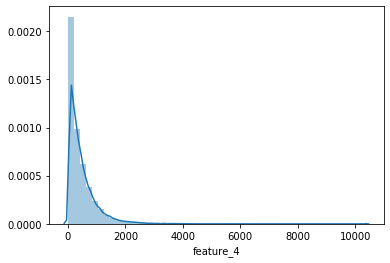

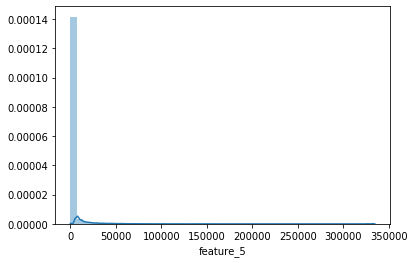

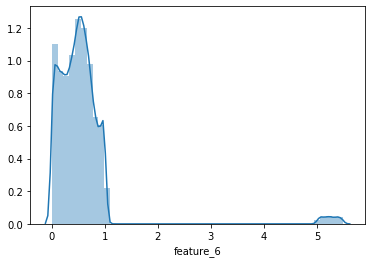

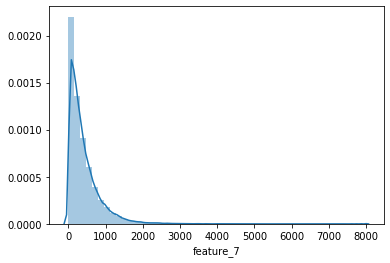

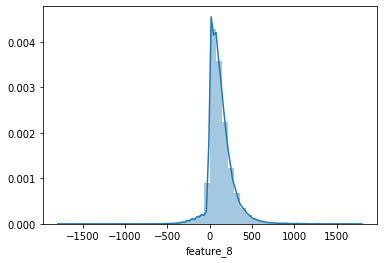

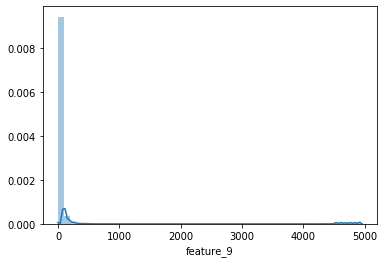

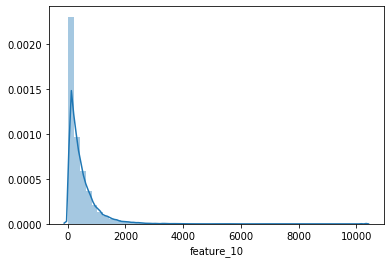

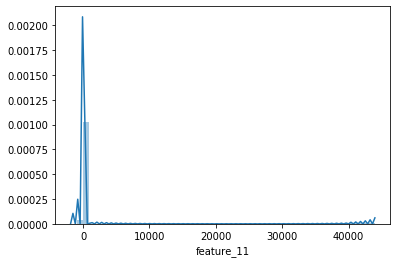

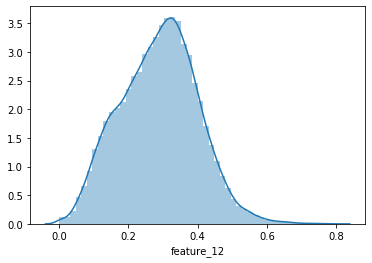

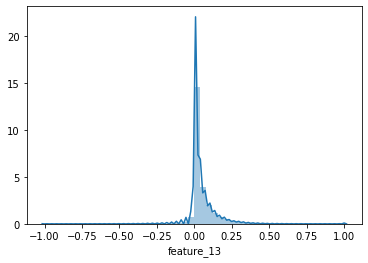

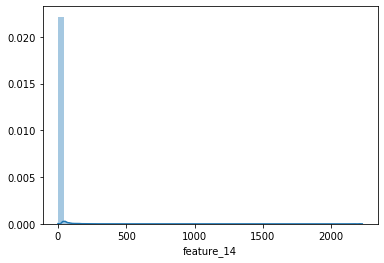

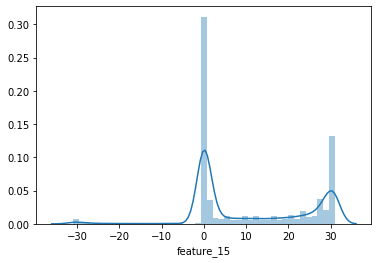

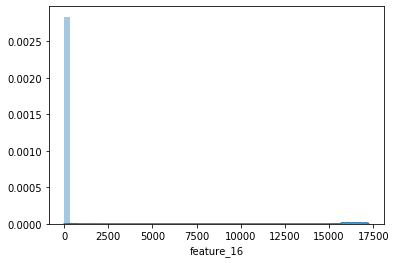

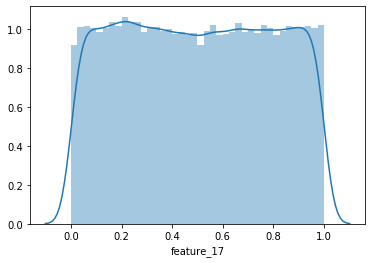

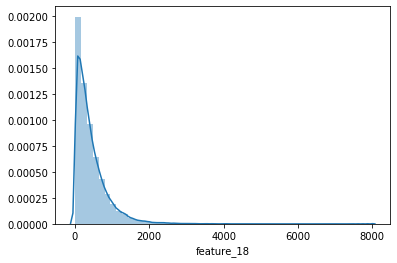

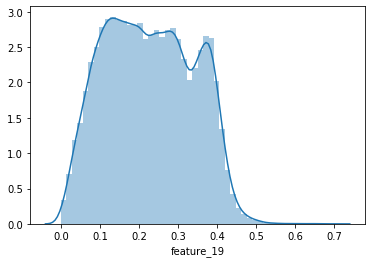

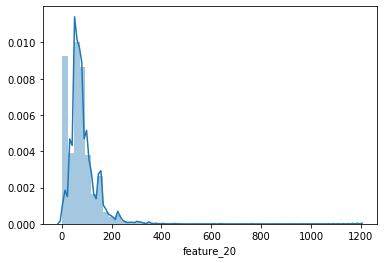

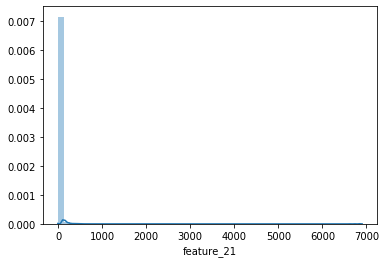

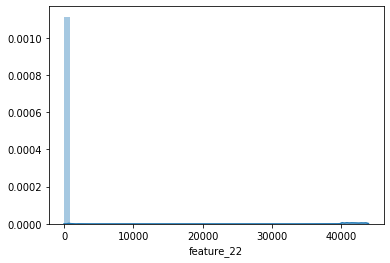

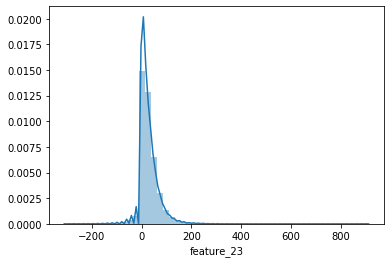

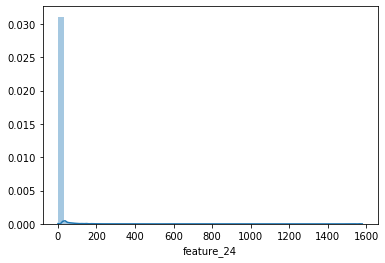

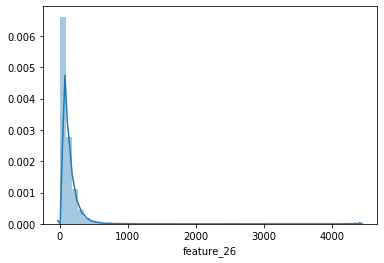

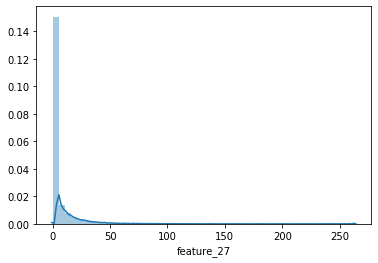

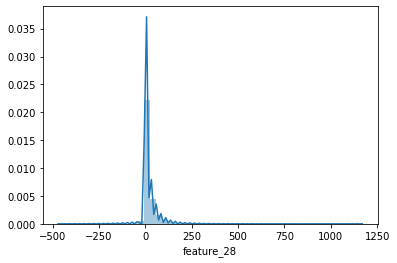

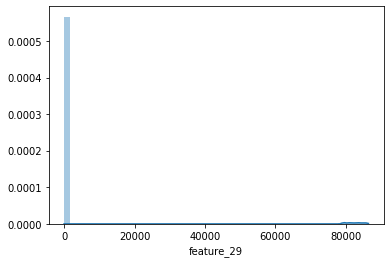

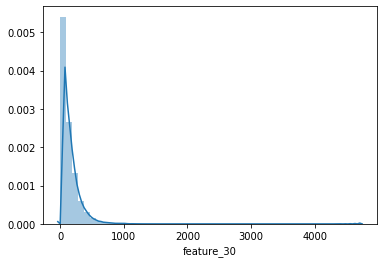

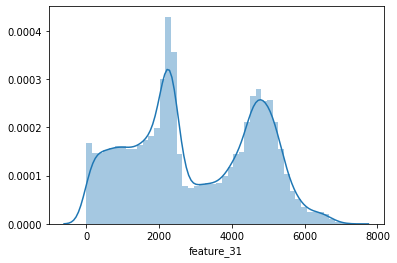

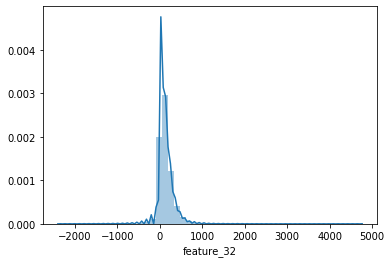

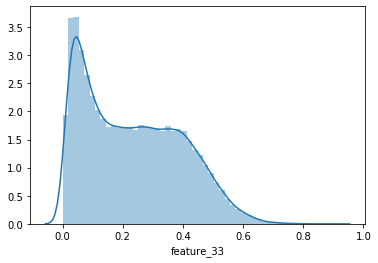

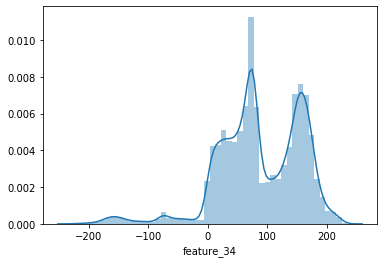

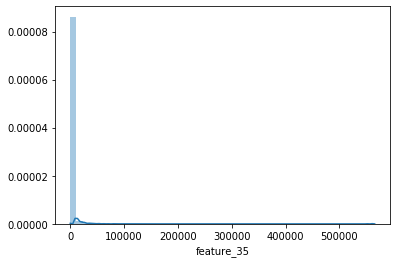

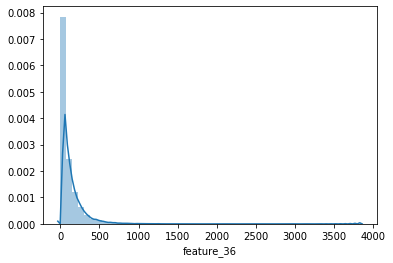

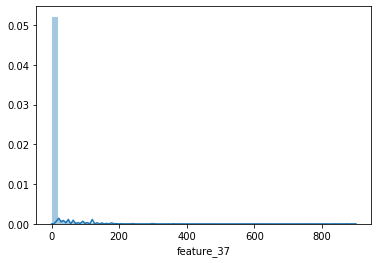

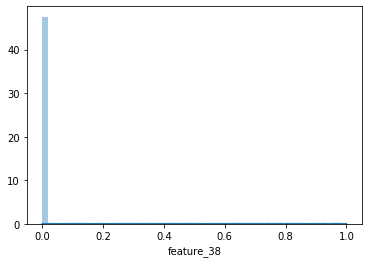

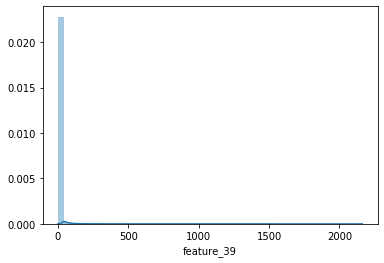

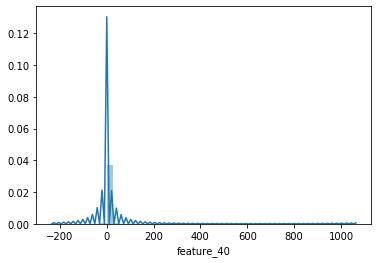

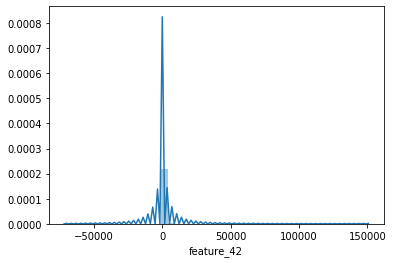

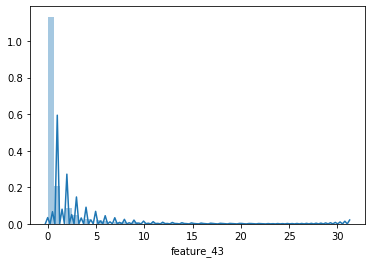

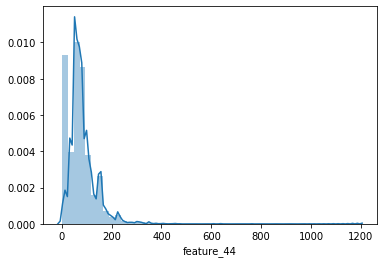

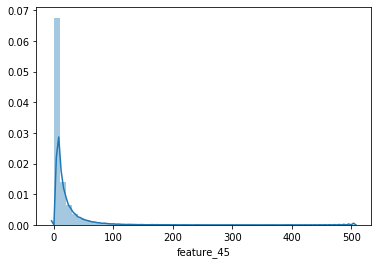

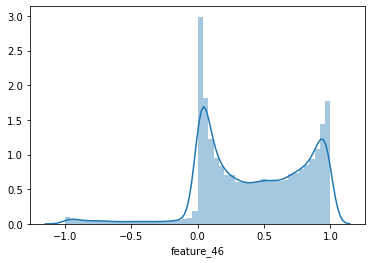

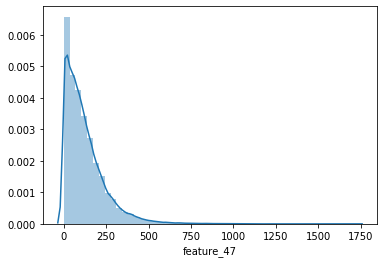

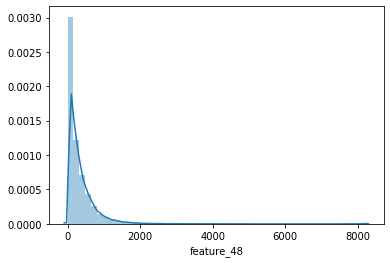

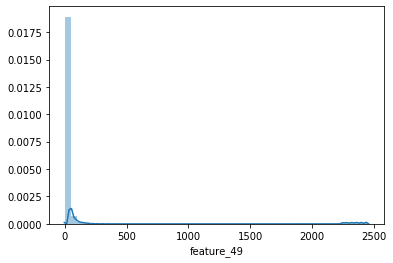

In [8]:
val = tabular_df.dtypes[tabular_df.dtypes == 'float64'].index
# sns.distplot(tabular_df[val[0]])
for i in val:
    plt.figure()
    sns.distplot(tabular_df[i].dropna())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

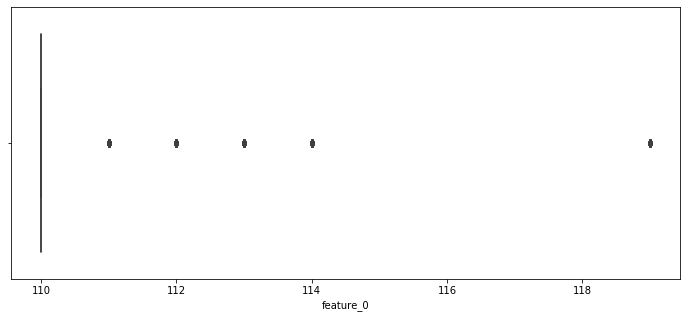

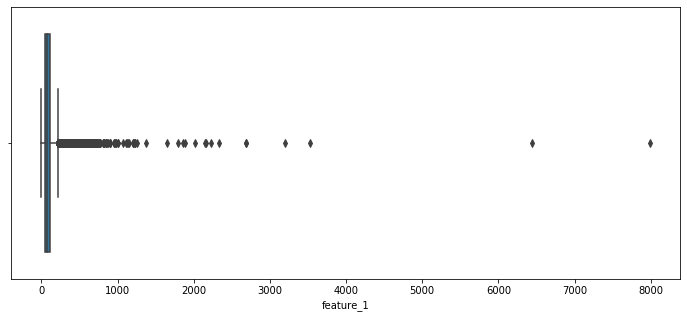

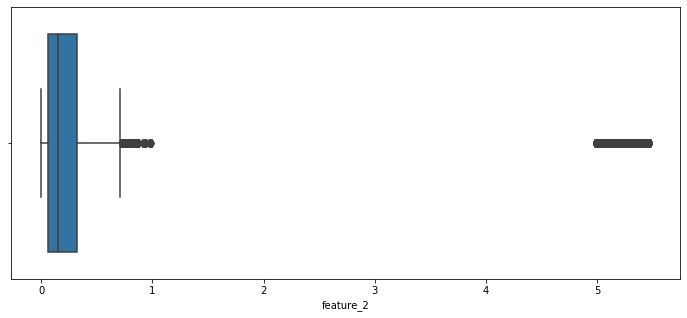

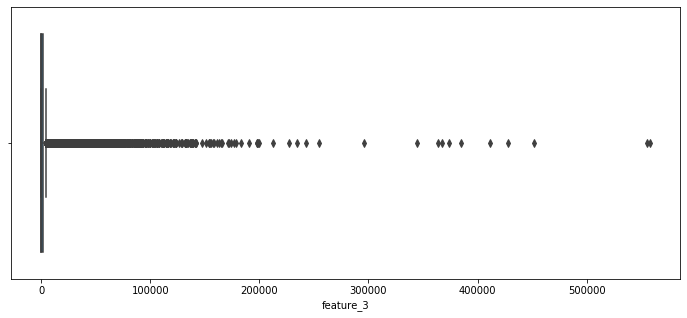

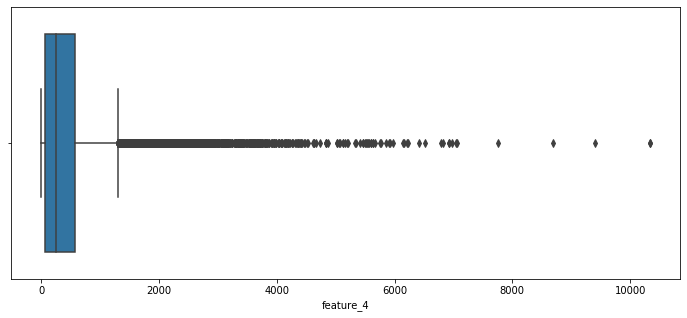

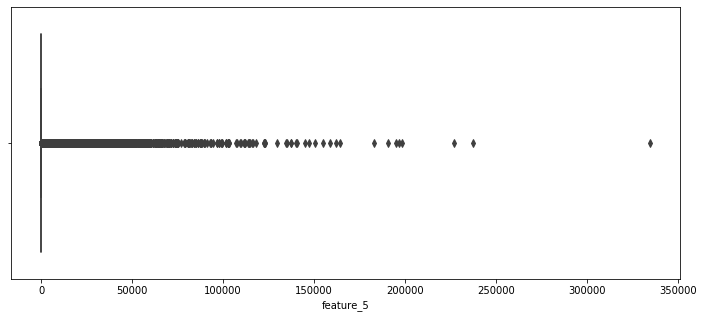

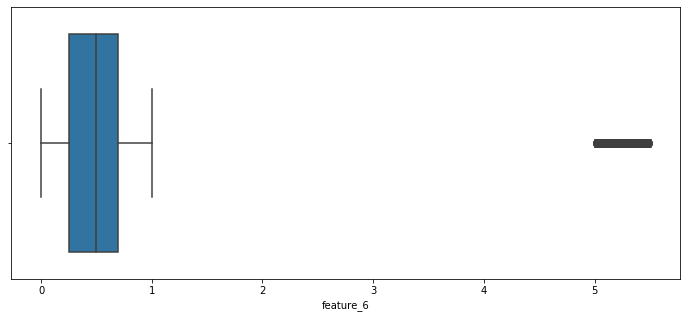

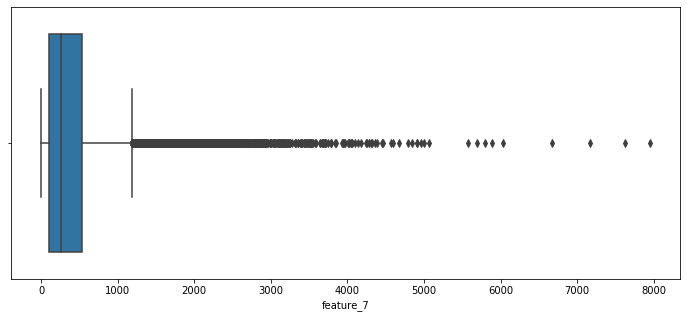

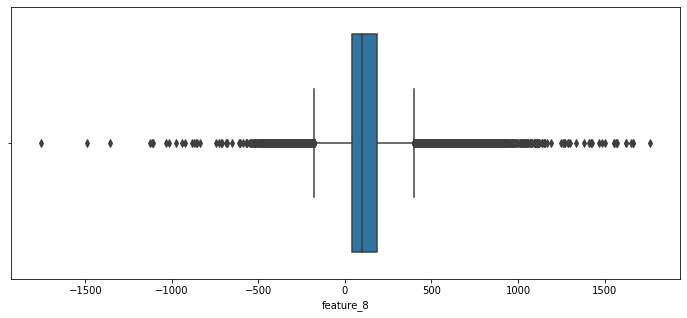

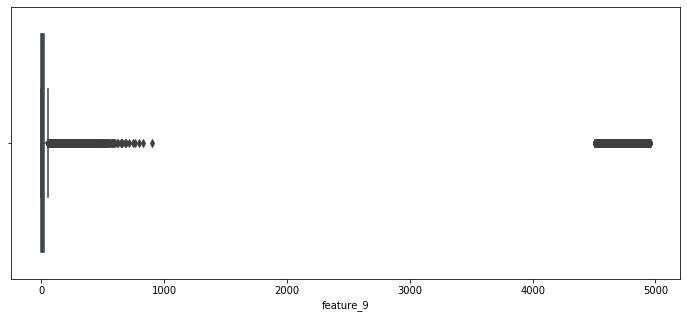

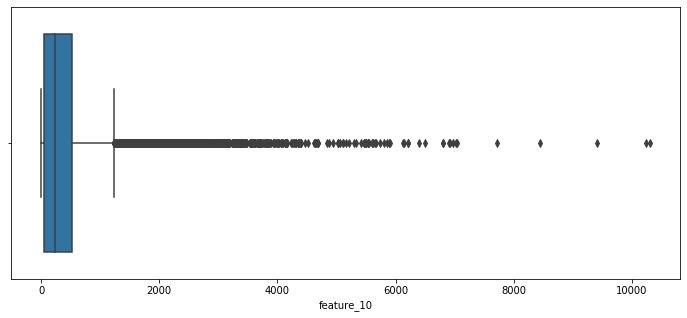

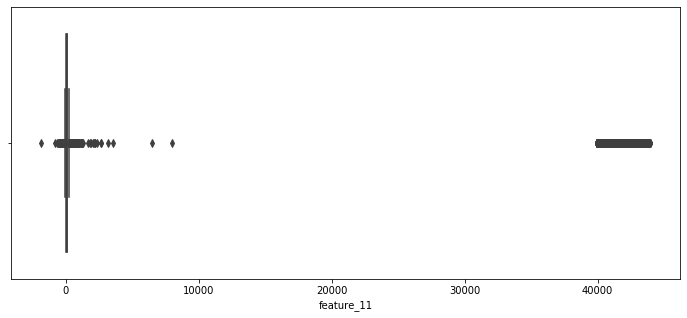

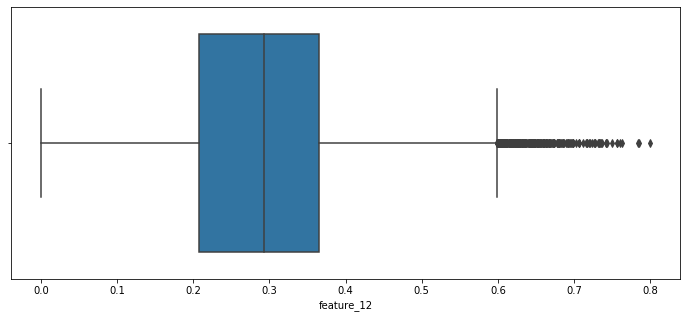

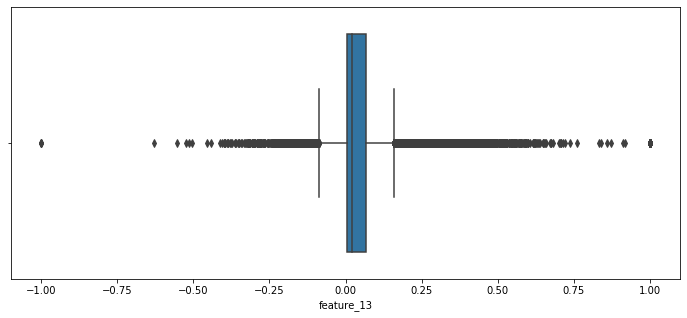

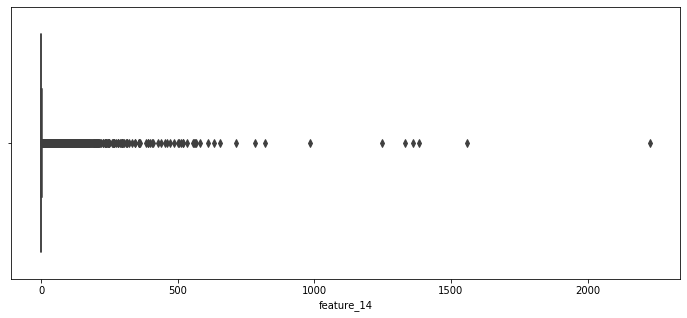

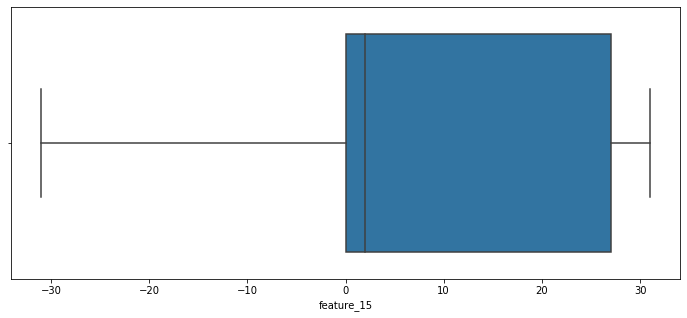

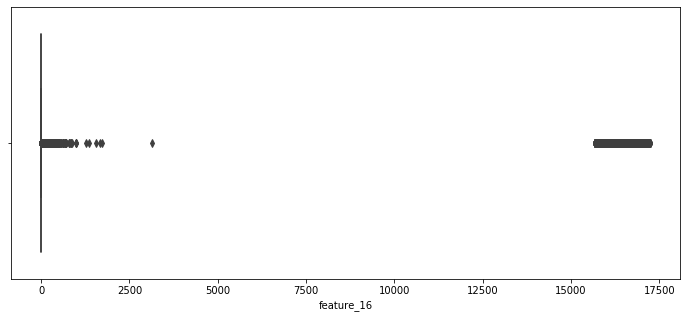

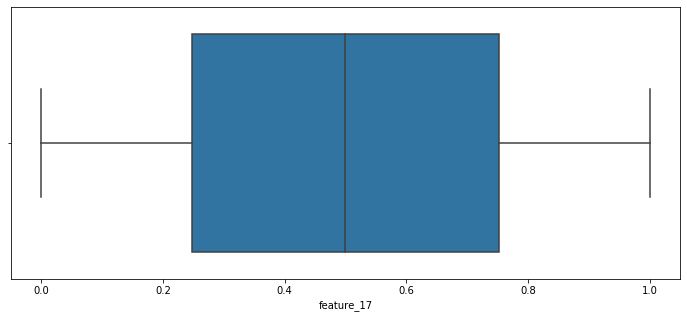

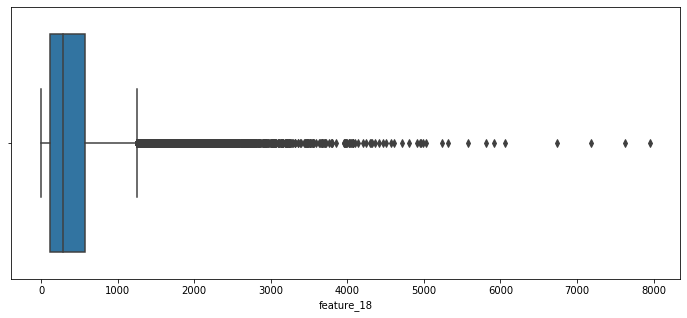

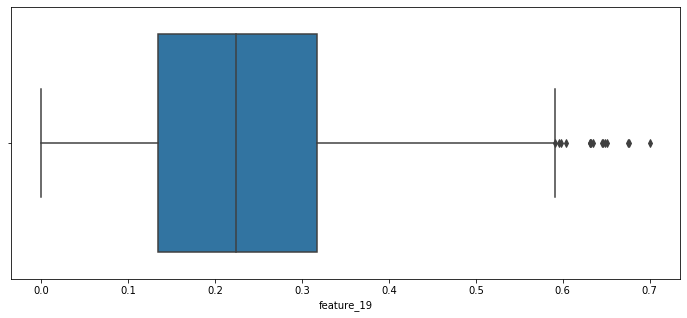

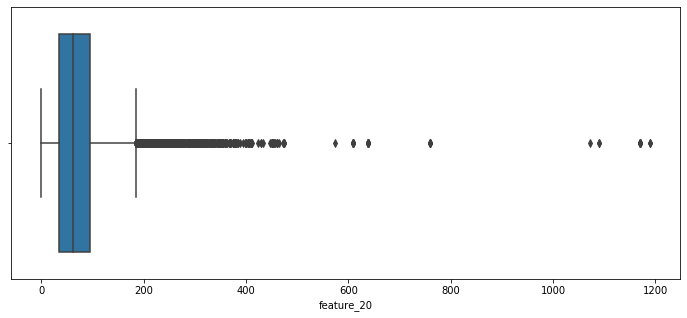

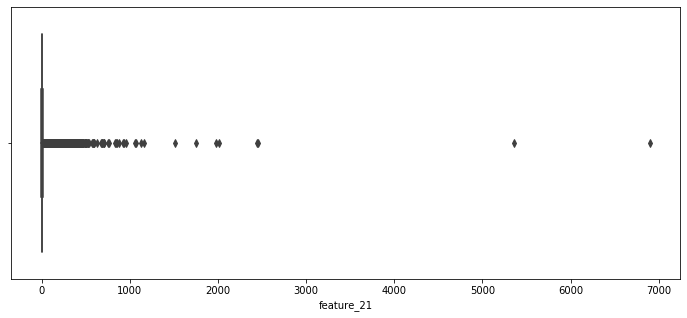

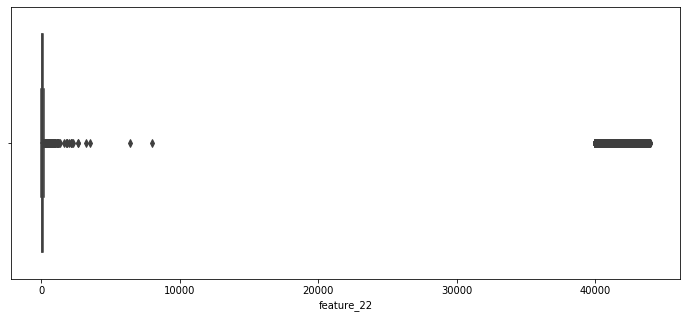

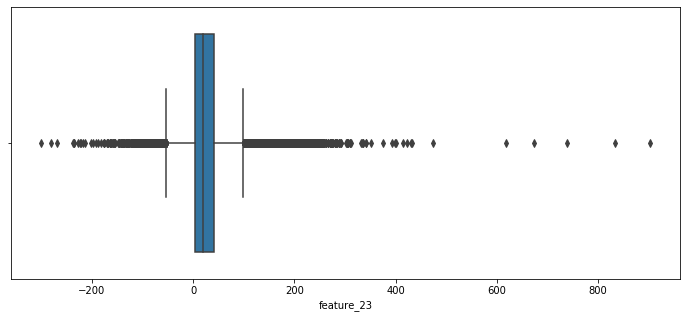

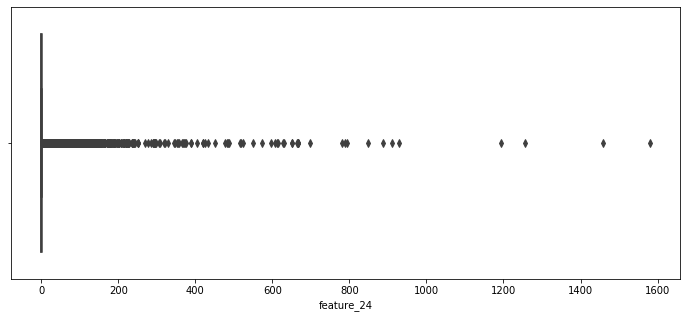

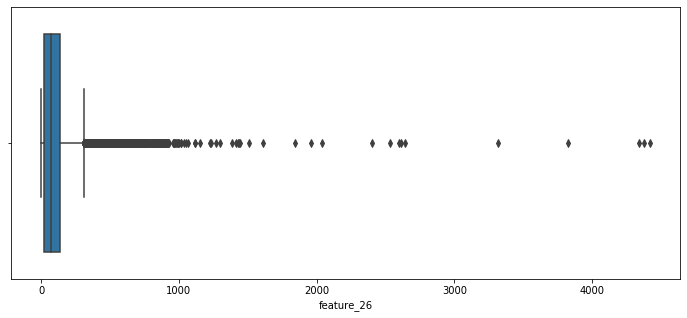

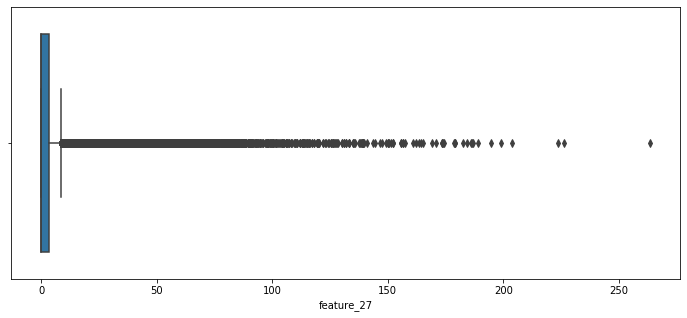

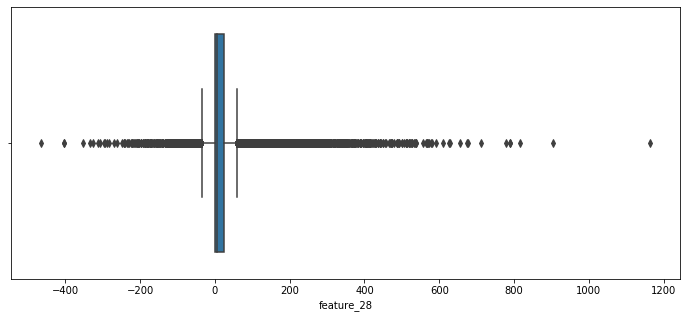

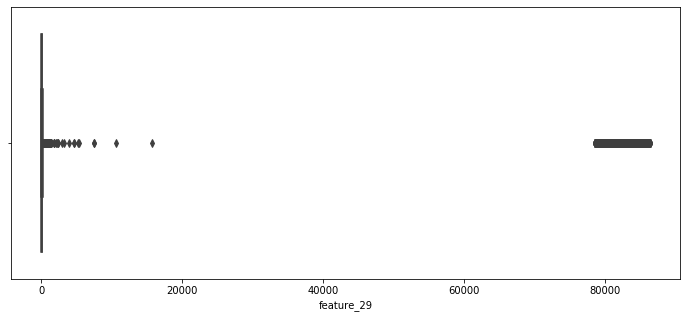

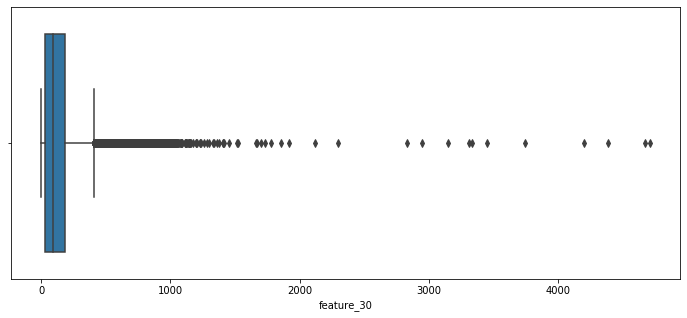

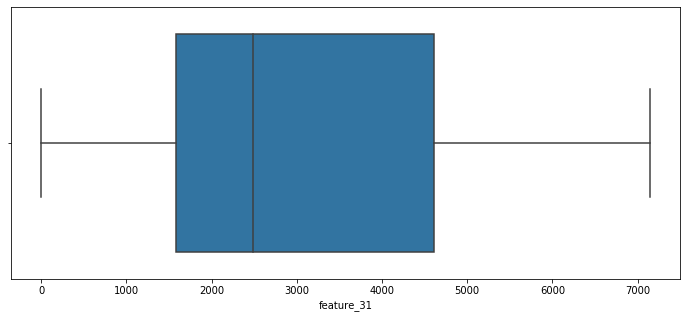

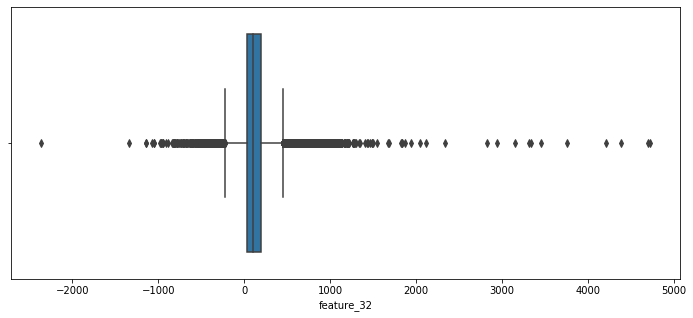

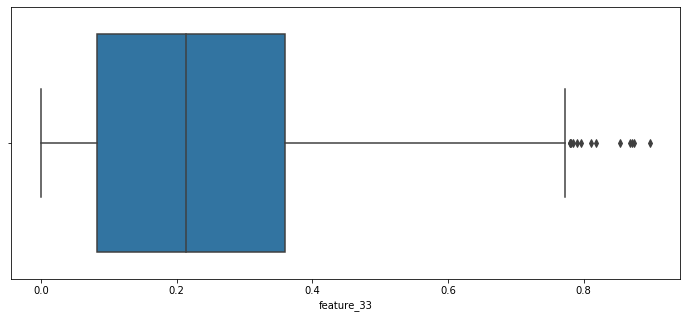

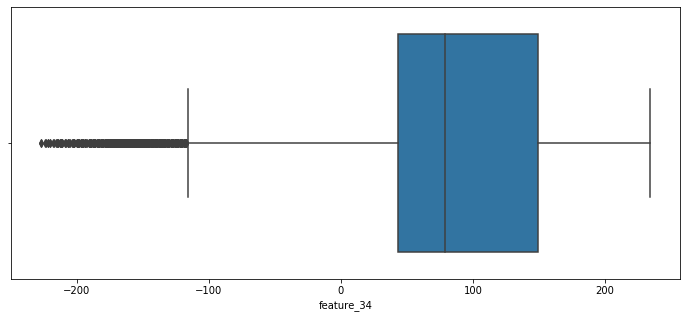

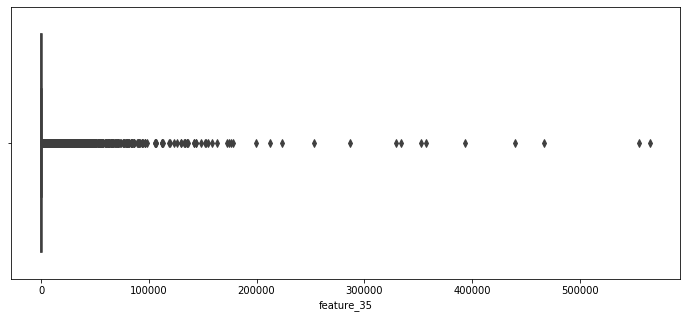

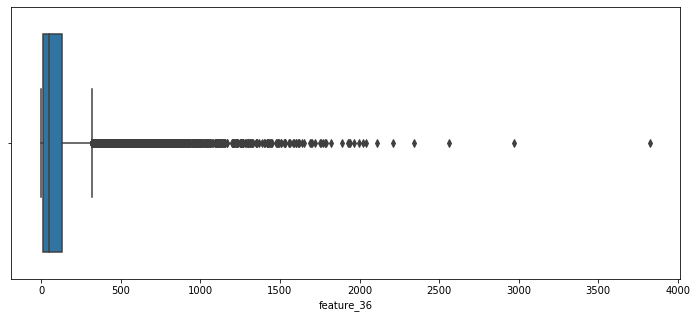

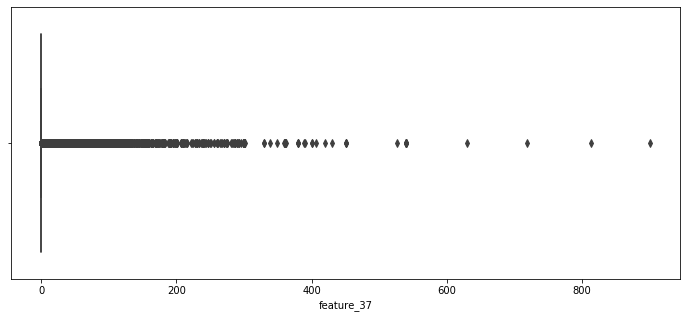

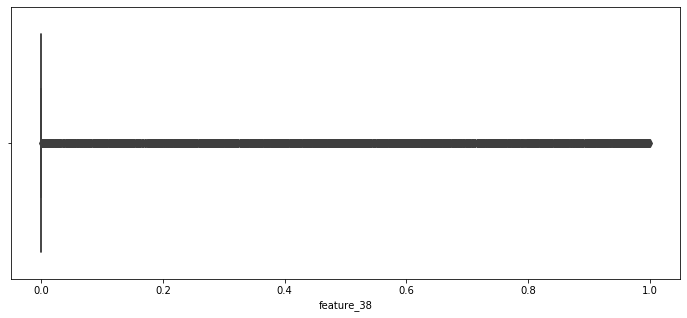

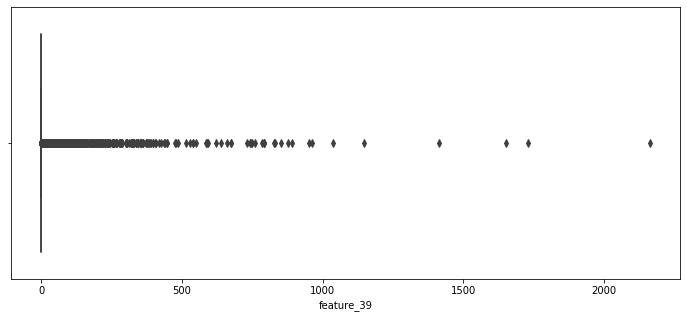

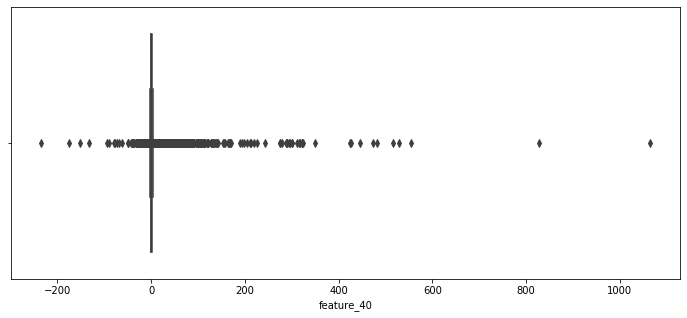

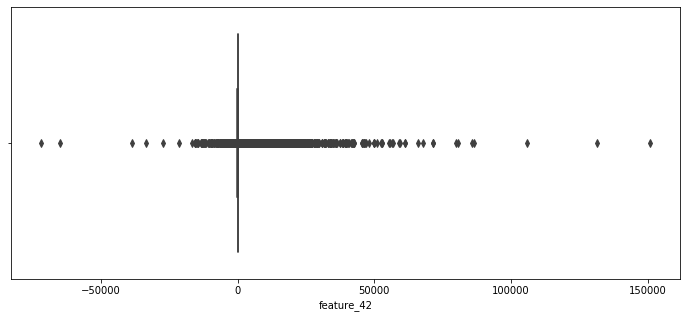

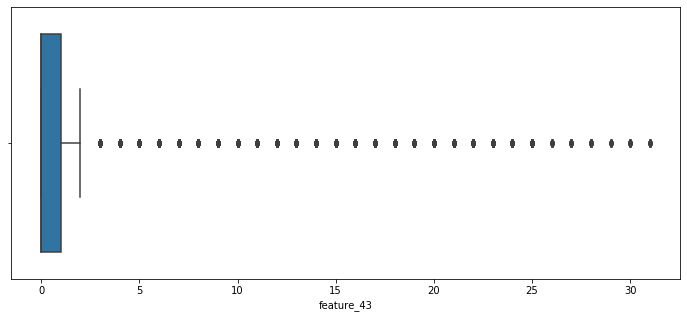

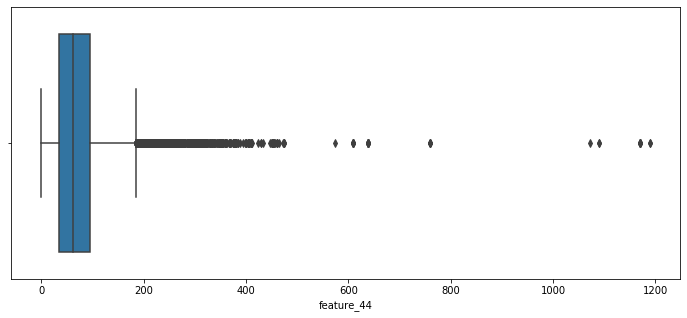

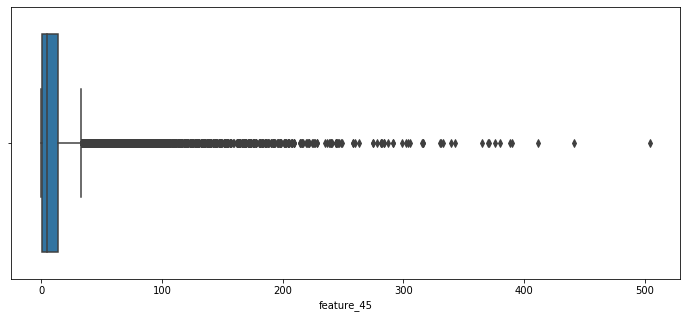

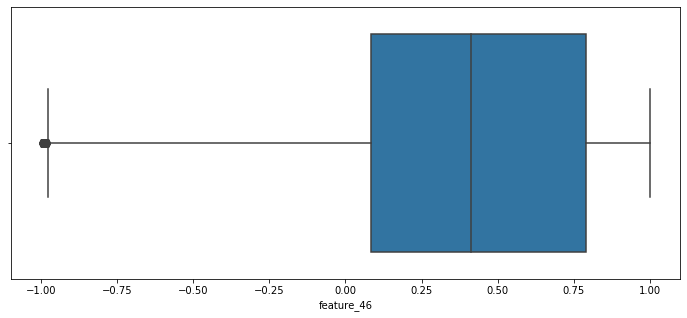

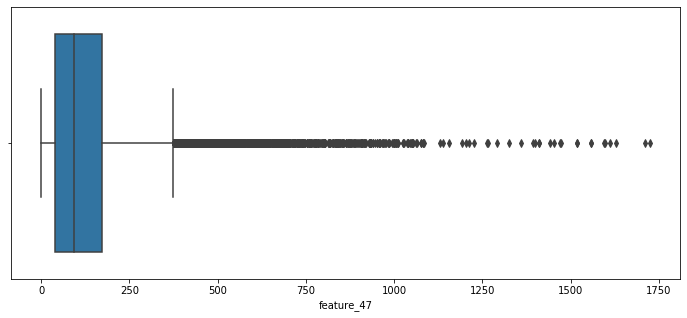

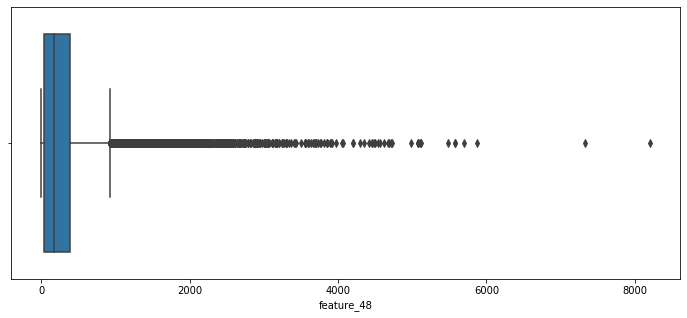

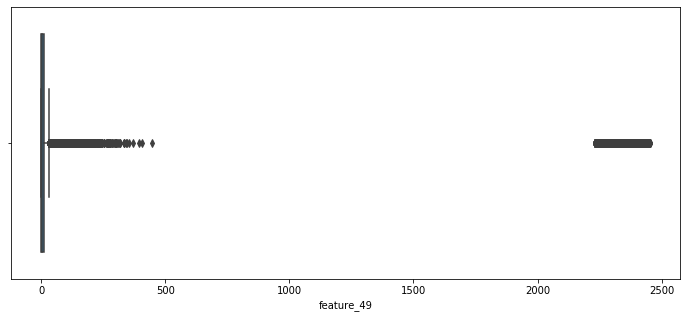

In [9]:
for i in val:
    plt.figure(figsize=(12, 5))
    sns.boxplot(tabular_df[i].dropna())

In [10]:
hashed_feature = pd.read_csv('data/hashed_feature.csv')

In [11]:
hashed_feature['feature_50'].nunique()

5009

In [12]:
feature_25_unique = list(tabular_df['feature_25'].unique().copy())
dummy_var = pd.get_dummies(tabular_df['feature_25'])
dummy_var

,11e623a37e87cf7995c466723ec99688d55cae8c,390c481a740bb1c12c57f33dc5263ced2ab11796,aa2c96dacf00c451ef465f6115a45a20bccf1256,b204e1e3743cc314841070435211e25f4602b9fd,cf3cca1da7361bd988642600e76c4a3021be8ccf,cf7413906c99be47067cb3fb6299959857710d77,d458ece2abeae803254c5d442b2e2a80f58a4153,f9ae10397ed62e79c644d06842bbcd92963a5927
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0


In [13]:
tabular_df = pd.concat([tabular_df, dummy_var], axis=1)

In [14]:
tabular_df.drop(['feature_17', 'feature_25', 'period'], axis=1, inplace=True)

In [15]:
from numpy import mean
from numpy import std

In [16]:
data_mean, data_std = mean(tabular_df), std(tabular_df)

In [17]:
# identify outliers
cut_off = data_std * 3

In [18]:
lower, upper = data_mean - cut_off, data_mean + cut_off

In [19]:
tabular_df

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_48,feature_49,11e623a37e87cf7995c466723ec99688d55cae8c,390c481a740bb1c12c57f33dc5263ced2ab11796,aa2c96dacf00c451ef465f6115a45a20bccf1256,b204e1e3743cc314841070435211e25f4602b9fd,cf3cca1da7361bd988642600e76c4a3021be8ccf,cf7413906c99be47067cb3fb6299959857710d77,d458ece2abeae803254c5d442b2e2a80f58a4153,f9ae10397ed62e79c644d06842bbcd92963a5927
0,0,110.0,55.00,0.432017,0.000000,176.78,0.0,0.323712,NaN,147.0,...,133.28,0.000000,0,0,0,0,0,0,0,1
1,0,110.0,110.00,0.397517,0.000000,315.42,0.0,0.316798,NaN,135.0,...,229.97,0.000000,0,0,0,0,0,0,0,1
2,0,110.0,55.00,0.359440,0.000000,354.55,0.0,0.339188,NaN,181.0,...,231.78,0.000000,0,0,0,0,0,0,0,1
3,0,110.0,55.00,0.285707,0.000000,229.98,0.0,0.415428,NaN,142.0,...,183.83,0.000000,0,0,0,0,0,0,0,1
4,0,110.0,55.00,0.101487,444.730391,307.12,0.0,0.569670,NaN,92.0,...,155.83,0.000000,1,0,0,0,0,0,0,0
5,0,110.0,55.00,0.083655,92.284390,277.02,0.0,0.494765,NaN,110.0,...,187.20,0.000000,1,0,0,0,0,0,0,0
6,0,110.0,55.00,0.107765,543.138844,690.38,0.0,0.522715,NaN,190.0,...,493.97,0.000000,1,0,0,0,0,0,0,0
7,0,110.0,55.00,0.097857,578.379486,619.35,0.0,0.537815,NaN,178.0,...,474.95,0.000000,1,0,0,0,0,0,0,0
8,0,110.0,55.75,0.179713,186.258945,539.15,0.0,0.547634,NaN,125.0,...,394.97,0.000000,1,0,0,0,0,0,0,0
9,0,110.0,60.00,0.129596,1099.289203,608.28,0.0,0.438465,NaN,152.0,...,500.32,0.000000,1,0,0,0,0,0,0,0


In [20]:
np.array(feature_25_unique)

array(['f9ae10397ed62e79c644d06842bbcd92963a5927',
       '11e623a37e87cf7995c466723ec99688d55cae8c',
       'aa2c96dacf00c451ef465f6115a45a20bccf1256',
       'b204e1e3743cc314841070435211e25f4602b9fd',
       '390c481a740bb1c12c57f33dc5263ced2ab11796',
       'cf3cca1da7361bd988642600e76c4a3021be8ccf',
       'd458ece2abeae803254c5d442b2e2a80f58a4153',
       'cf7413906c99be47067cb3fb6299959857710d77'], dtype='<U40')

In [21]:
tabular_df_with_oultiers = tabular_df.drop(feature_25_unique, axis=1).copy()
# Replace outliers with NAN
tabular_df_outliers_nan = tabular_df_with_oultiers.mask(tabular_df_with_oultiers.sub(tabular_df_with_oultiers.mean()).div(tabular_df_with_oultiers.std()).abs().gt(2))
# tabular_df_outliers_nan = tabular_df.mask(tabular_df.sub(tabular_df.mean()).div(tabular_df.std()).abs().gt(2))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

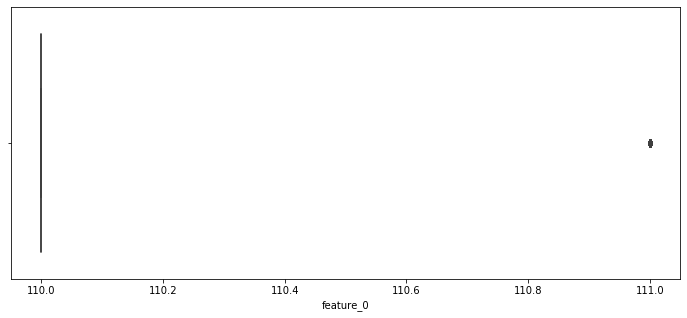

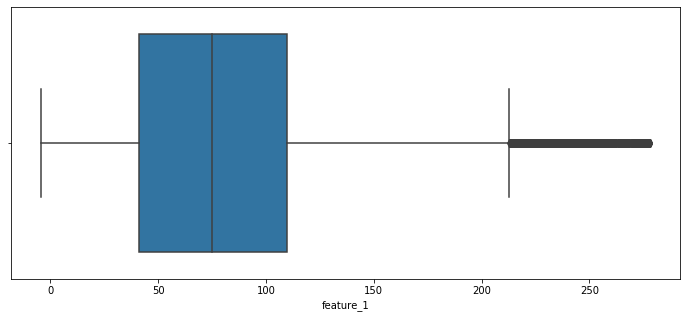

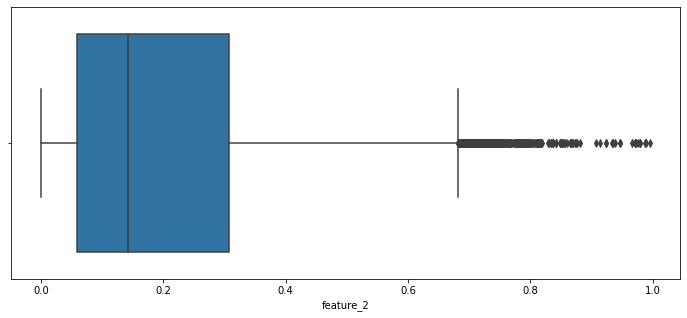

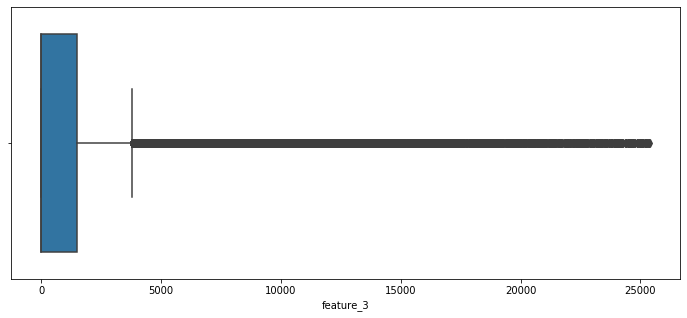

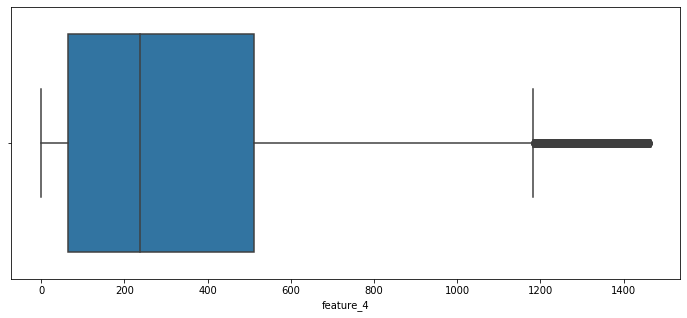

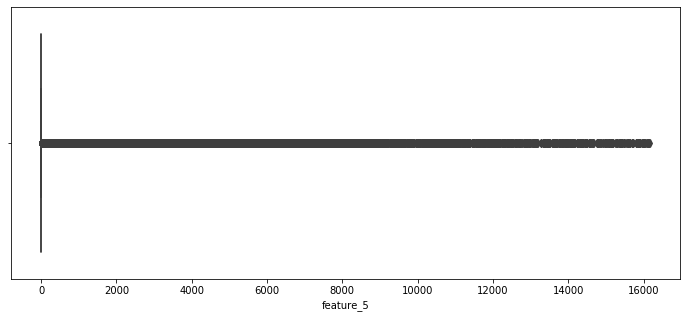

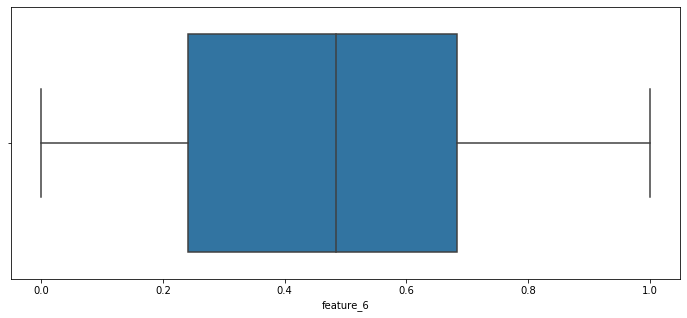

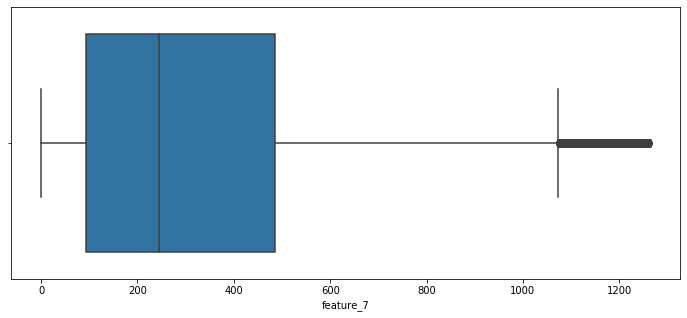

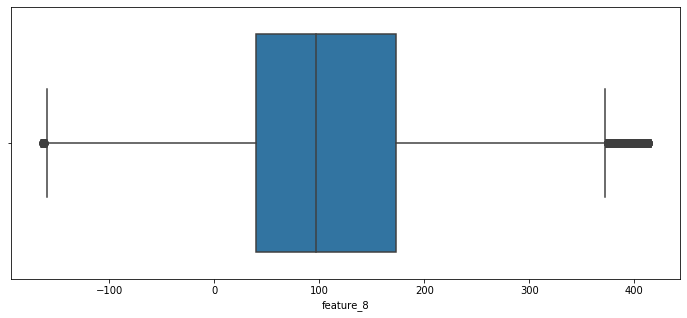

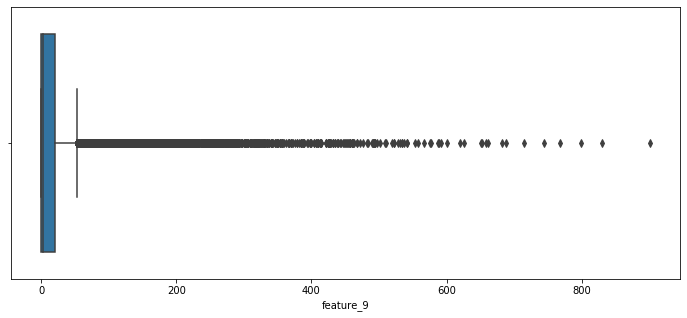

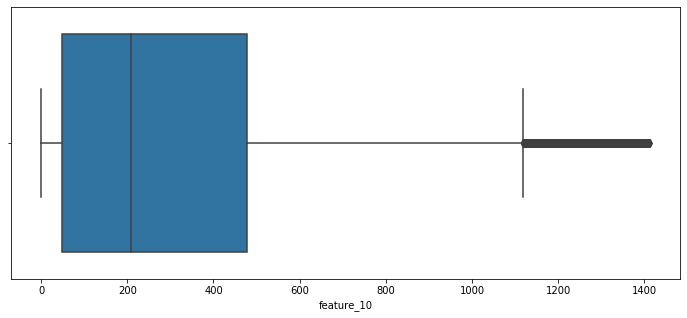

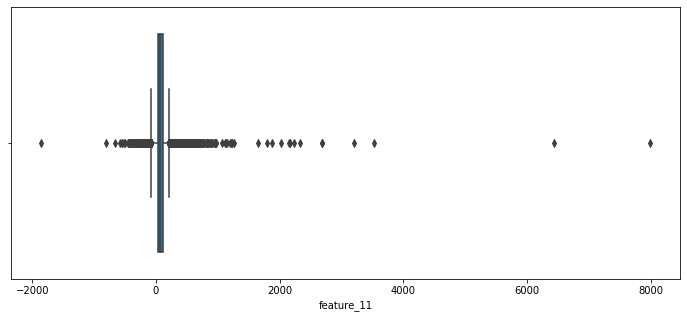

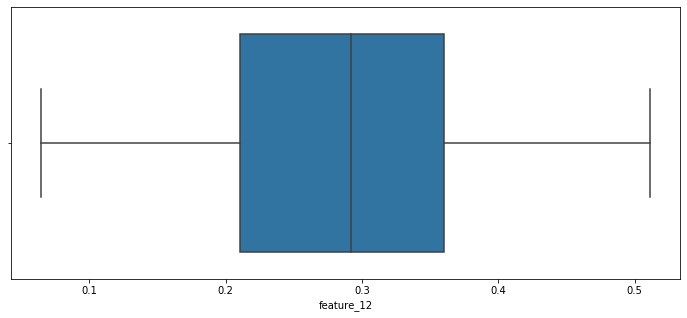

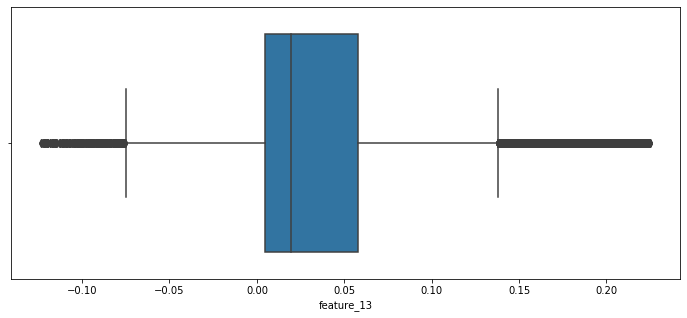

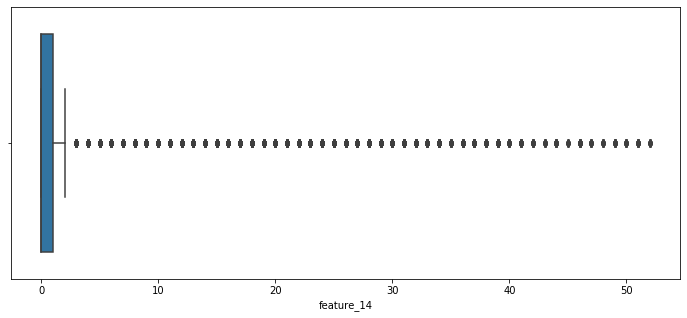

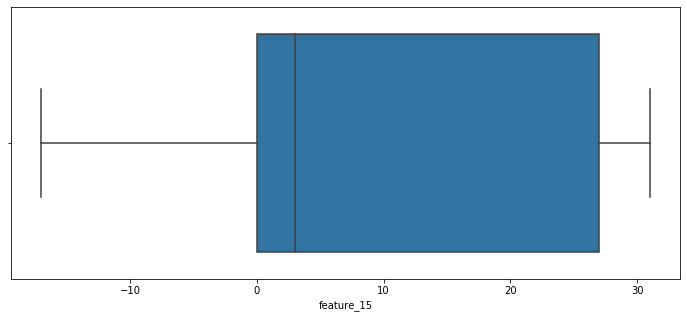

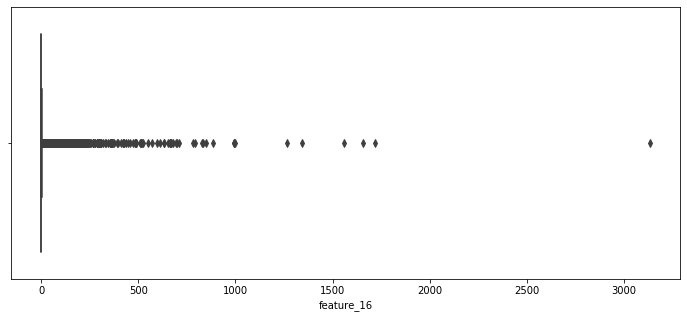

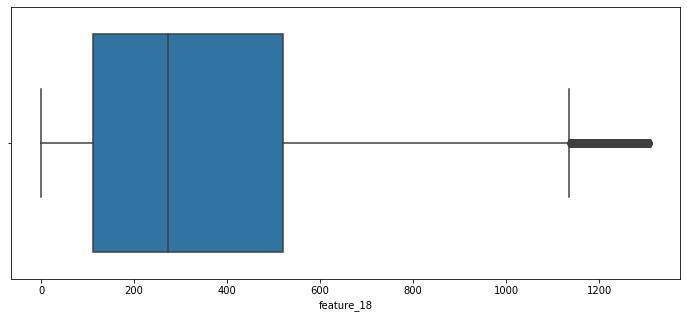

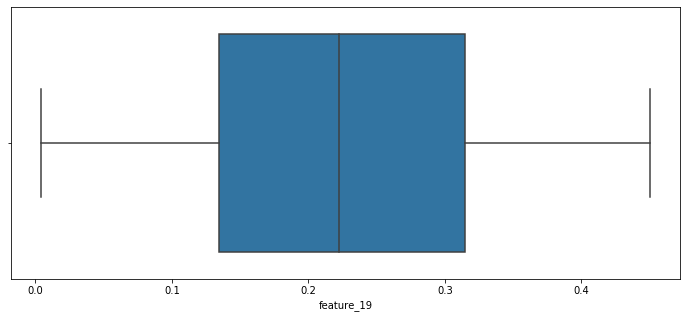

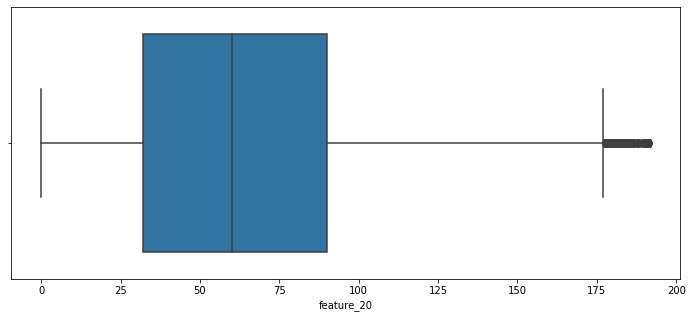

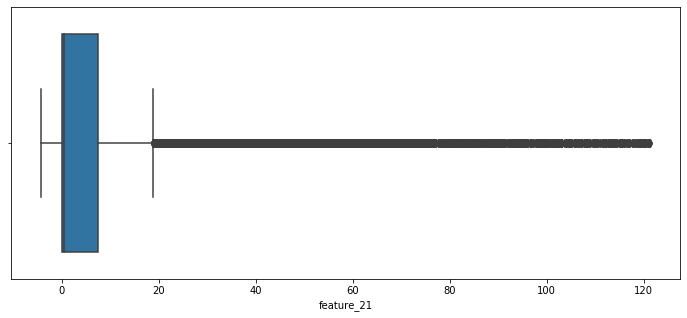

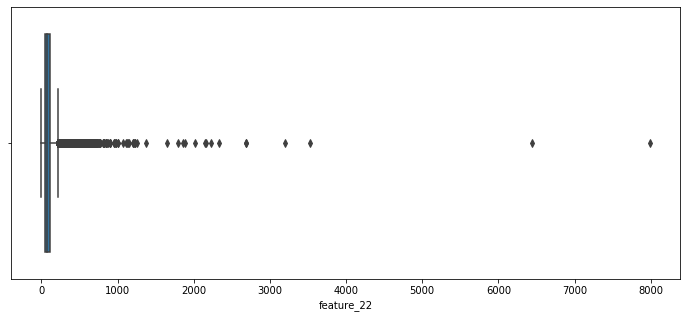

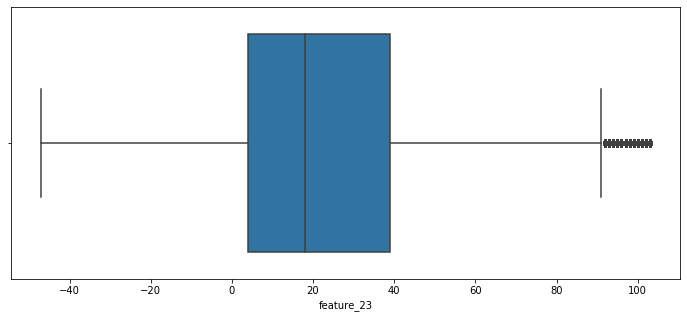

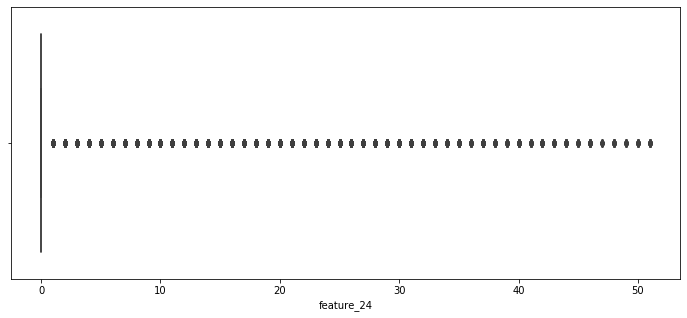

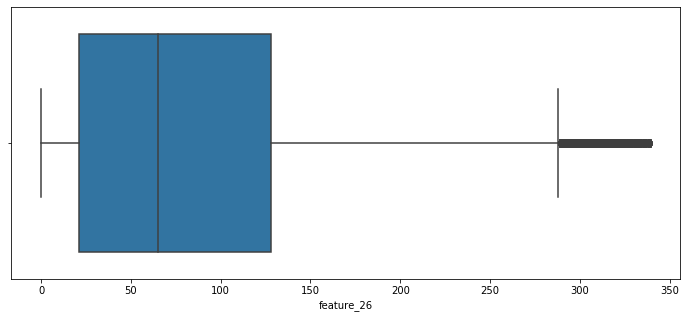

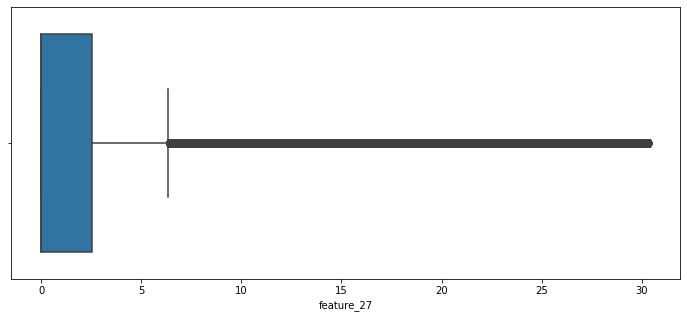

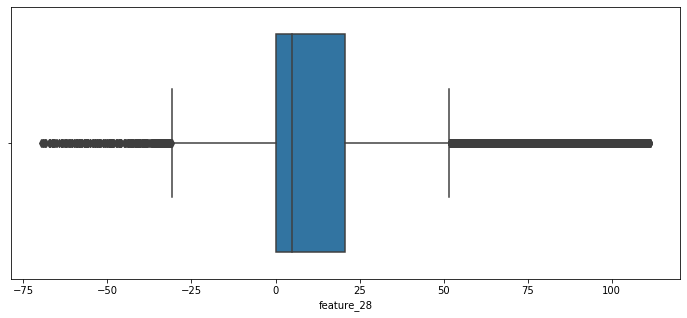

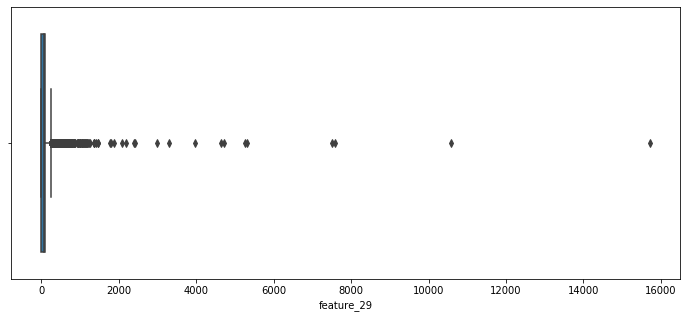

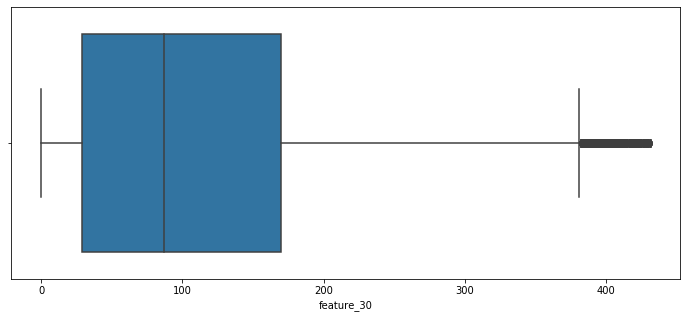

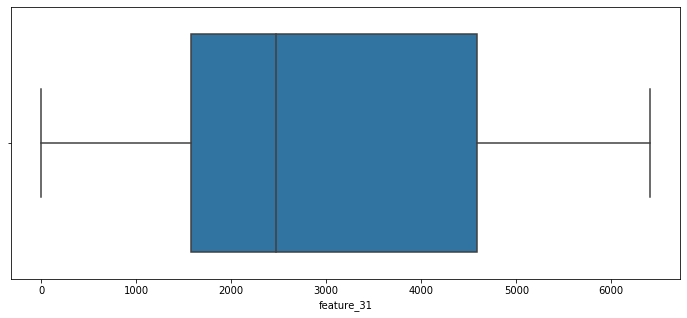

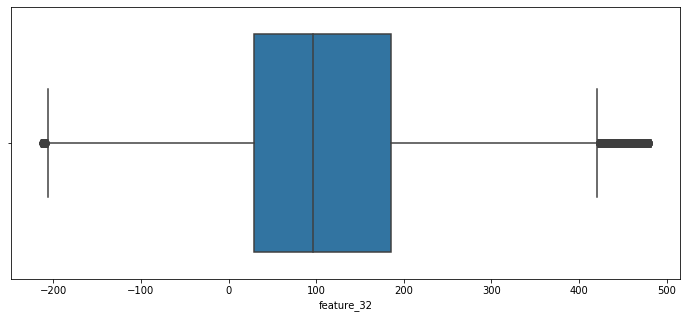

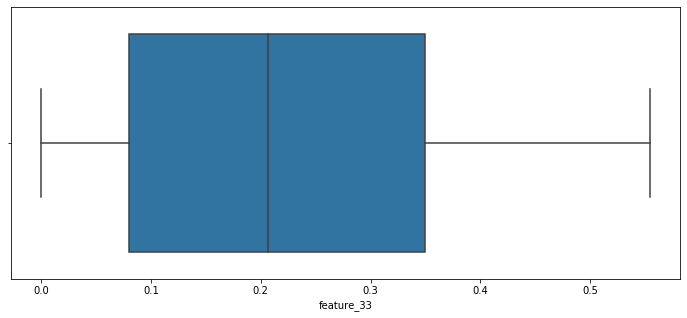

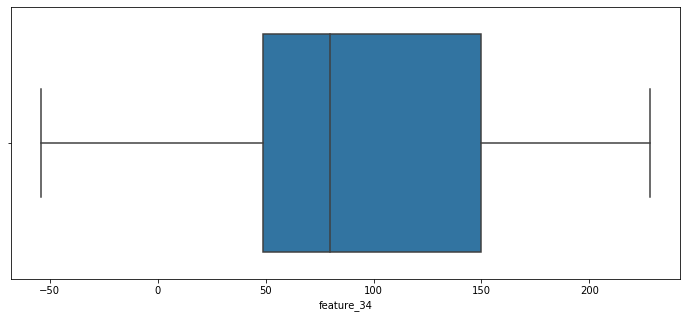

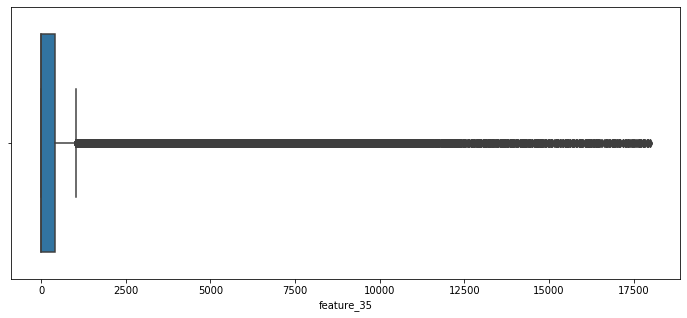

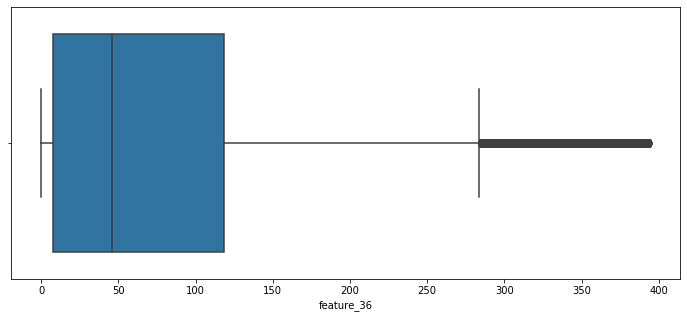

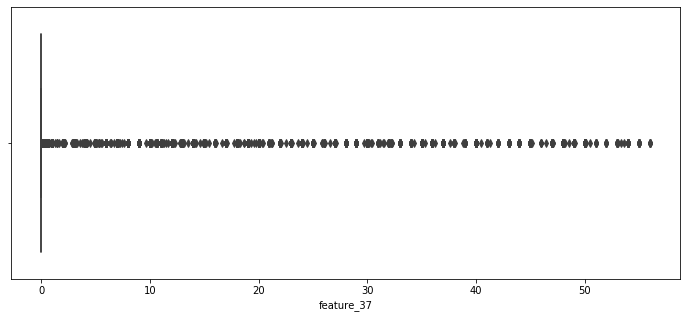

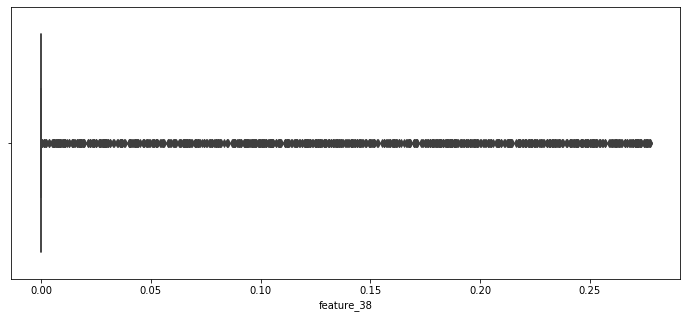

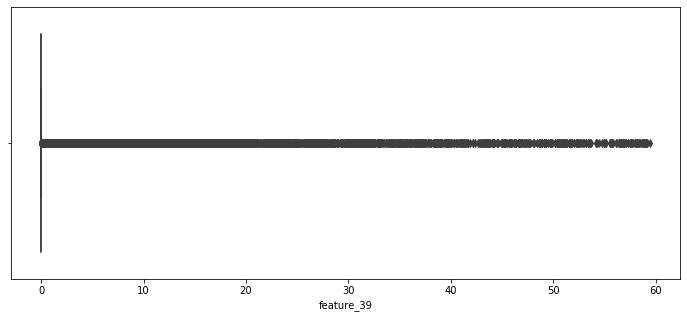

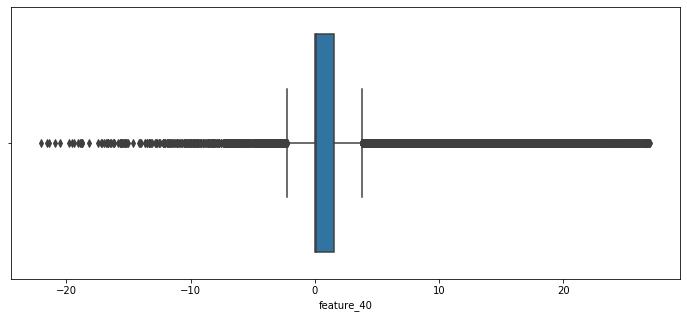

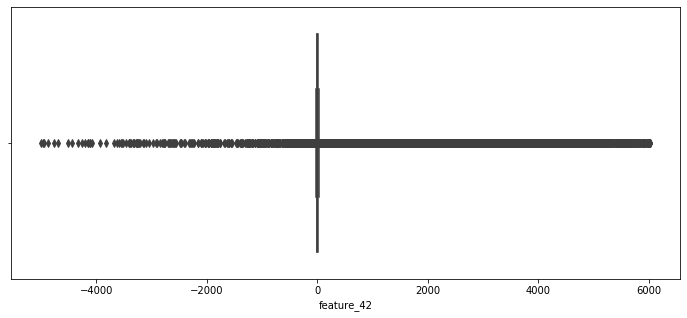

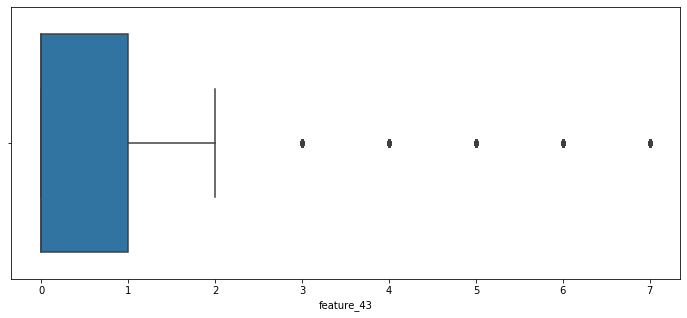

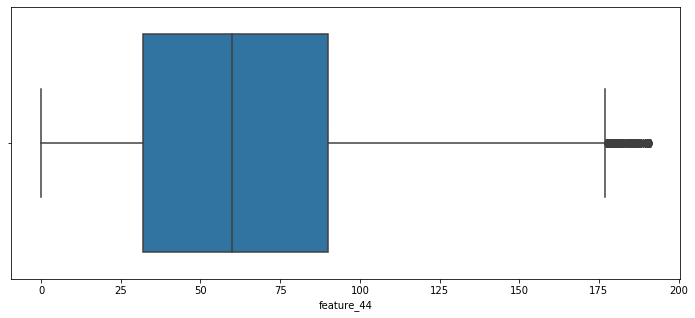

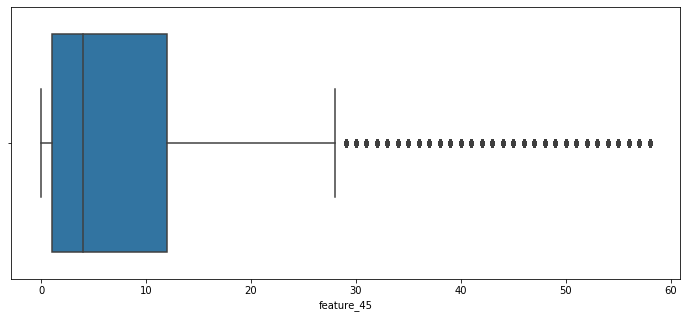

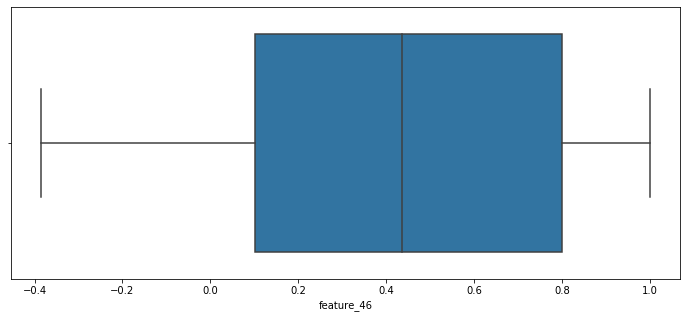

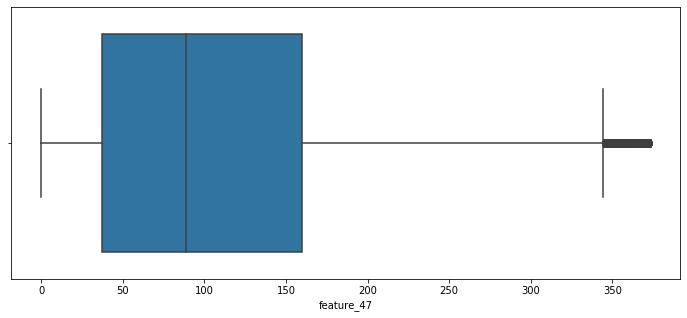

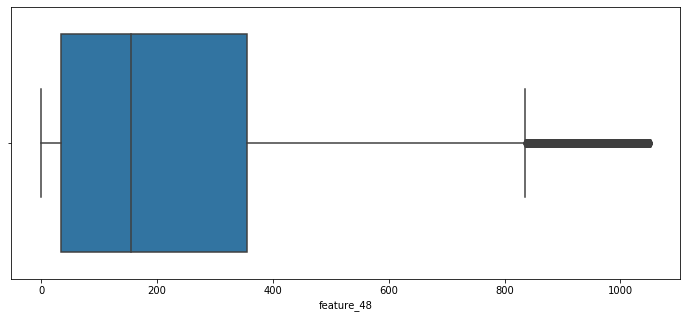

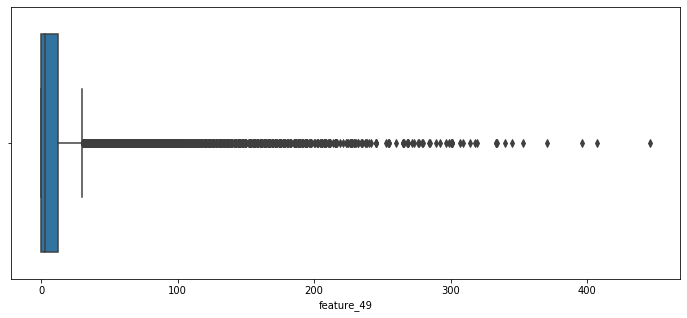

In [22]:
for i in tabular_df_outliers_nan.dtypes[tabular_df_outliers_nan.dtypes == 'float64'].index:
    plt.figure(figsize=(12, 5))
    sns.boxplot(tabular_df_outliers_nan[i].dropna())

In [23]:
for i in tabular_df_outliers_nan.columns:
    # count number of rows with missing values
    n_miss = tabular_df_outliers_nan[i].isnull().sum()
    perc = n_miss / tabular_df_outliers_nan.shape[0] * 100
    print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> id, Missing: 0 (0.0%)
> feature_0, Missing: 3818 (6.2%)
> feature_1, Missing: 4380 (7.1%)
> feature_2, Missing: 4710 (7.7%)
> feature_3, Missing: 4427 (7.2%)
> feature_4, Missing: 5328 (8.7%)
> feature_5, Missing: 4425 (7.2%)
> feature_6, Missing: 4675 (7.6%)
> feature_7, Missing: 5570 (9.1%)
> feature_8, Missing: 6009 (9.8%)
> feature_9, Missing: 4097 (6.7%)
> feature_10, Missing: 5445 (8.9%)
> feature_11, Missing: 4387 (7.2%)
> feature_12, Missing: 5582 (9.1%)
> feature_13, Missing: 6237 (10.2%)
> feature_14, Missing: 3566 (5.8%)
> feature_15, Missing: 3992 (6.5%)
> feature_16, Missing: 4353 (7.1%)
> feature_18, Missing: 5632 (9.2%)
> feature_19, Missing: 4112 (6.7%)
> feature_20, Missing: 4909 (8.0%)
> feature_21, Missing: 3687 (6.0%)
> feature_22, Missing: 4090 (6.7%)
> feature_23, Missing: 6020 (9.8%)
> feature_24, Missing: 3614 (5.9%)
> feature_26, Missing: 4921 (8.0%)
> feature_27, Missing: 5255 (8.6%)
> feature_28, Missing: 5458 (8.9%)
> feature_29, Missing: 3726 (6.1%)
> fea

In [24]:
tabular_df_nan = pd.concat([tabular_df_outliers_nan, tabular_df[feature_25_unique]], axis=1)

In [25]:
y_train = pd.read_csv('data/train.csv')
y_train.head()

,id,target
0,0,0
1,1,0
2,2,1
3,3,0
4,4,1


In [26]:
train_size = y_train.shape[0]
print("train size =", train_size)
print("1s to 0s:", y_train['target'].sum()/train_size)

train size = 4084
1s to 0s: 0.26322233104799214


### Train test split

In [27]:
train_df = tabular_df_nan[:train_size*12]
res_df = train_df.set_index('id').join(y_train.set_index('id'))

In [28]:
X = res_df.drop('target', axis=1)
y = res_df['target']

In [29]:
X_test = tabular_df_nan[train_size*12:].set_index('id')

In [30]:
X_test_index_col = X_test.index

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [32]:
imputer = IterativeImputer(max_iter=50, verbose=1, tol=0.01)

In [33]:
X_transformed = imputer.fit_transform(X)

[IterativeImputer] Completing matrix with shape (49008, 56)
[IterativeImputer] Change: 29793.21159537141, scaled tolerance: 253.59947376 
[IterativeImputer] Change: 10839.449658896561, scaled tolerance: 253.59947376 
[IterativeImputer] Change: 1171.5770630480172, scaled tolerance: 253.59947376 
[IterativeImputer] Change: 421.5026543027593, scaled tolerance: 253.59947376 
[IterativeImputer] Change: 421.9275854352555, scaled tolerance: 253.59947376 
[IterativeImputer] Change: 382.2547980089528, scaled tolerance: 253.59947376 
[IterativeImputer] Change: 377.72185190269727, scaled tolerance: 253.59947376 
[IterativeImputer] Change: 369.1593019431677, scaled tolerance: 253.59947376 
[IterativeImputer] Change: 359.41311883700797, scaled tolerance: 253.59947376 
[IterativeImputer] Change: 350.4401614718638, scaled tolerance: 253.59947376 
[IterativeImputer] Change: 341.67052847699233, scaled tolerance: 253.59947376 
[IterativeImputer] Change: 333.15940455477806, scaled tolerance: 253.59947376

In [34]:
X_test_transformed = imputer.transform(X_test)

[IterativeImputer] Completing matrix with shape (12264, 56)


In [35]:
X_transformed

array([[1.10000000e+02, 5.50000000e+01, 4.32016783e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.10000000e+02, 1.10000000e+02, 3.97516742e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.10000000e+02, 5.50000000e+01, 3.59440000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.10000000e+02, 3.17600000e+01, 1.08558000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.10000000e+02, 3.19109991e+02, 1.11005000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.10000000e+02, 2.26260000e+02, 8.83400000e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [36]:
X_df = pd.DataFrame(data=X_transformed, columns=X.columns)
X_test = pd.DataFrame(data=X_test_transformed, columns=X_test.columns)
X_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_48,feature_49,f9ae10397ed62e79c644d06842bbcd92963a5927,11e623a37e87cf7995c466723ec99688d55cae8c,aa2c96dacf00c451ef465f6115a45a20bccf1256,b204e1e3743cc314841070435211e25f4602b9fd,390c481a740bb1c12c57f33dc5263ced2ab11796,cf3cca1da7361bd988642600e76c4a3021be8ccf,d458ece2abeae803254c5d442b2e2a80f58a4153,cf7413906c99be47067cb3fb6299959857710d77
0,110.0,55.0,0.432017,0.000000,176.78,0.0,0.323712,335.247244,147.0,0.0,...,133.28,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,110.0,110.0,0.397517,0.000000,315.42,0.0,0.316798,393.623783,135.0,0.0,...,229.97,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,110.0,55.0,0.359440,0.000000,354.55,0.0,0.339188,528.733690,181.0,0.0,...,231.78,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,110.0,55.0,0.285707,0.000000,229.98,0.0,0.415428,401.585327,142.0,0.0,...,183.83,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,110.0,55.0,0.101487,444.730391,307.12,0.0,0.569670,156.628748,92.0,0.0,...,155.83,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
for i in X_df.columns:
    # count number of rows with missing values
    n_miss = X_df[i].isnull().sum()
    perc = n_miss / X_df.shape[0] * 100
    print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> feature_0, Missing: 0 (0.0%)
> feature_1, Missing: 0 (0.0%)
> feature_2, Missing: 0 (0.0%)
> feature_3, Missing: 0 (0.0%)
> feature_4, Missing: 0 (0.0%)
> feature_5, Missing: 0 (0.0%)
> feature_6, Missing: 0 (0.0%)
> feature_7, Missing: 0 (0.0%)
> feature_8, Missing: 0 (0.0%)
> feature_9, Missing: 0 (0.0%)
> feature_10, Missing: 0 (0.0%)
> feature_11, Missing: 0 (0.0%)
> feature_12, Missing: 0 (0.0%)
> feature_13, Missing: 0 (0.0%)
> feature_14, Missing: 0 (0.0%)
> feature_15, Missing: 0 (0.0%)
> feature_16, Missing: 0 (0.0%)
> feature_18, Missing: 0 (0.0%)
> feature_19, Missing: 0 (0.0%)
> feature_20, Missing: 0 (0.0%)
> feature_21, Missing: 0 (0.0%)
> feature_22, Missing: 0 (0.0%)
> feature_23, Missing: 0 (0.0%)
> feature_24, Missing: 0 (0.0%)
> feature_26, Missing: 0 (0.0%)
> feature_27, Missing: 0 (0.0%)
> feature_28, Missing: 0 (0.0%)
> feature_29, Missing: 0 (0.0%)
> feature_30, Missing: 0 (0.0%)
> feature_31, Missing: 0 (0.0%)
> feature_32, Missing: 0 (0.0%)
> feature_33, Miss

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [39]:
transform_cols = X.dtypes[(X.dtypes == 'float64') | (X.dtypes == 'int64')].index

In [40]:
ct = ColumnTransformer([

        ('numeric_scaler', StandardScaler(), transform_cols)

    ], remainder='passthrough')

X_res_df = ct.fit_transform(X_df)

In [41]:
X_test = ct.transform(X_test)

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
sm = SMOTE(random_state = 2) 
X_train, y_train = sm.fit_sample(X_res_df, y.ravel()) 

In [44]:
print("1s to 0s:", sum(y_train)/y_train.size)

1s to 0s: 0.5


### Baseline

In [45]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, \
                            roc_auc_score , accuracy_score, precision_score

In [47]:
def get_score():
  seed = 11

  results = []
  names = []
  scoring = 'roc_auc'

  for name, model in models:
        strat = StratifiedKFold(n_splits=10, random_state=seed)

        cv_results = cross_val_score(model, X_train, y_train, cv=strat, scoring=scoring)
        
        results.append(cv_results)
        names.append(name)
        
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
  return results

In [48]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000))) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DecTree', DecisionTreeClassifier())) 
models.append(('RF', RandomForestClassifier(n_estimators = 10))) 
models.append(('XGB', XGBClassifier()))
models.append(('NaiveBayes', GaussianNB()))

In [49]:
mod_list = []
for mod , _ in models:
  mod_list.append(mod)
mod_list.append('Cleaning')

df_boxplot = pd.DataFrame(columns=['Score', 'ML'])

In [50]:
def append_res_to_boxplot(results, df):
  i = 0
  while i < len(results[0]):
    line = []
    for num, ml in zip(results, mod_list): 
      line.append([num[i],ml])
    i = i+1
    df = df.append(pd.DataFrame(line, columns=['Score', 'ML']),ignore_index=True)
  return df

In [51]:
results = get_score()
df_boxplot = append_res_to_boxplot(results, df_boxplot)

C:\Users\darin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.745280 (0.011006)


C:\Users\darin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 0.745143 (0.010629)


C:\Users\darin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DecTree: 0.752855 (0.046841)


C:\Users\darin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.905395 (0.050827)


C:\Users\darin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGB: 0.895494 (0.097461)


C:\Users\darin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NaiveBayes: 0.645783 (0.020877)


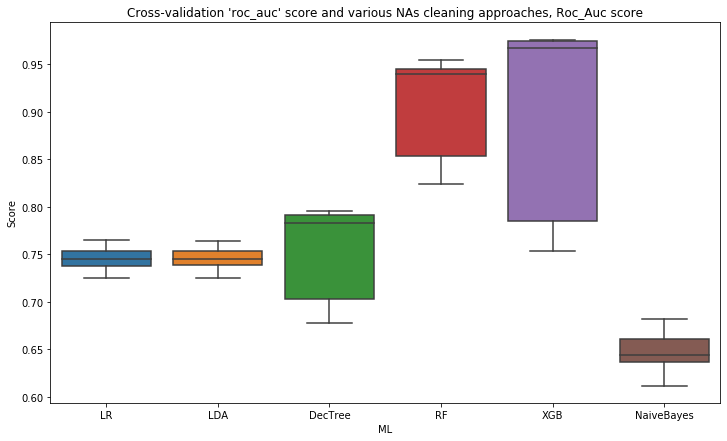

In [52]:
# Plotting the results 
plt.figure(figsize=(12,7))
plt.title("Cross-validation 'roc_auc' score and various NAs cleaning approaches, Roc_Auc score")
sns.boxplot(data = df_boxplot, x = 'ML',y='Score')

### Hyperparameter tuning

In [59]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
parameters = {
    'n_estimators'      : np.arange(100, 500, 1000),
    'max_depth'         : np.arange(4, 12, 20),
    'random_state'      : [0],
    'min_samples_split' : np.arange(2, 5),
    'min_samples_leaf'  : np.arange(1, 5),
    #'max_features': ['auto'],
    #'criterion' :['gini']
}
# Create a based model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf, param_grid = parameters, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [60]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.4min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([4]),
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': array([100]), 'random_state': [0]},
             verbose=2)

In [61]:
grid_search.best_params_

{'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 0}

In [62]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=3, random_state=0)

In [63]:
grid_search.best_score_

0.6869668771463388

In [64]:
y_pred = grid_search.predict(X_test)

In [65]:
df = pd.DataFrame({'id': X_test_index_col, 'score': y_pred})

In [66]:
df = df.groupby('id').agg('mean')

In [67]:
df['score'] = df['score'].round(0).astype(int)

In [68]:
df.to_csv('PonomarovaDarina_test.csv', index=False)